# Variable Transformations:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer, PowerTransformer

In [2]:
df = pd.read_csv('Data/Concrete_without_Outliers.csv')

In [3]:
df.columns

Index(['Cement', 'Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Compressive_Strength'],
      dtype='object')

In [4]:
data = df.copy()

## Custom-defined functions:

In [5]:
def diagnostic_plots(df, variable):
    
    """
    Function to plot a histogram and a Q-Q plot
    # Side by side, for a given variable
    """
    sns.set_style('darkgrid')
    
    # histogram
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
    sns.histplot(df[variable], kde=True, ax=ax1)
    ax1.set_title(f"Histogram of {variable}", size=10)
    
    # Q-Q plot
    stats.probplot(df[variable], dist='norm', plot=ax2)
    ax2.set_title(f"Q-Q plot of {variable}", size=10)
    
    fig.suptitle(f"Before Transformation - {variable}", weight='bold', size=12)

In [6]:
def diagnostic_after_transformation(df, variable, transformation):
        
    """
    Function to plot a histogram and a Q-Q plot
    # Side by side, for a given variable
    """
    sns.set_style('darkgrid')
    
    # histogram
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
    sns.histplot(df[variable], kde=True, ax=ax1)
    ax1.set_title(f"Histogram of {variable}", size=10)
    
    # Q-Q plot
    stats.probplot(df[variable], dist='norm', plot=ax2)
    ax2.set_title(f"Q-Q plot of {variable}", size=10)
    
    fig.suptitle(f"After {transformation.upper()} Transformation - {variable}", weight='bold', size=12)

In [23]:
def transformation(data, data_tf, variable, tsfr, power=1.5):
    
    # Logarithmic Transformation
    if tsfr == 'log_with_constant':
        transformer = FunctionTransformer(func = lambda x: np.log(x+1))
        data_tf[variable] = transformer.transform(data[variable])
    elif tsfr == 'Reciprocal':
        transformer = FunctionTransformer(func=lambda x: np.reciprocal(x+0.00001))
        data_tf[variable] = transformer.transform(data[variable])
    elif tsfr == 'square_root':
        transformer = FunctionTransformer(func= lambda x:np.round(np.sqrt(x), 2))
        data_tf[variable] = transformer.transform(data[variable])
    elif tsfr == 'Power_Transformation':
        transformer = FunctionTransformer(lambda x:np.power(x, power))
        data_tf[variable] = transformer.transform(data[variable])
    elif tsfr == 'Yeo-Johnson':
        transformer = PowerTransformer(method='yeo-johnson')
        transformer.fit(data[[variable]].fillna(1))
        data_tf[variable] = transformer.transform(data[[variable]].fillna(1))
        data_tf[variable] = pd.DataFrame(data_tf, columns=[variable])
    elif tsfr == 'Box-Cox':
        if any(x <= 0 for x in data[variable].unique()):
            print(f'{variable} contains less than zero values, so we cannot perform box-cox transformation on this variable') 
        else:
            transformer = PowerTransformer(method='box-cox')
            transformer.fit(data[[variable]].fillna(1))
            data_tf[variable] = transformer.transform(data[[variable]].fillna(1))
            data_tf[variable] = pd.DataFrame(data_tf, columns=[variable])
    else: 
        return 'Please enter a valid transformation name'
    return 'Transformation is successful'

In [8]:
data_tf = data.copy()

In [9]:
def variable_transformation(df, df_tf, variable, tsfr='log_with_constant', power=1.5):
    diagnostic_plots(df, variable)
    output = transformation(df,df_tf, variable, tsfr)
    if output == 'Transformation is successful':
        diagnostic_after_transformation(df_tf, variable, tsfr)
    else:
        return (output)

In [10]:
transformers = ['Original','log_with_constant', 'Reciprocal','square_root',"Power_Transformation",  "Yeo-Johnson",'Box-Cox',]

In [11]:
def all_transformations(variable):
    skewness_list = []
    for tsfr in range(len(transformers)):
        if tsfr == 0:
            skew=data[variable].skew()
            skewness_list.append(skew)
        else:
            variable_transformation(data, data_tf, variable, tsfr=transformers[tsfr])
            skew = data_tf[variable].skew()
            skewness_list.append(skew)
    results = pd.DataFrame(list(zip(transformers, skewness_list)), columns=['Transformation Name', 'Skewness'])
    return results.sort_values(by=['Skewness'], key = lambda x: x.abs())

In [12]:
df.columns

Index(['Cement', 'Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Compressive_Strength'],
      dtype='object')

## Applying Transformations on every feature:

### Cement

Transformation Name  Skewness
5           Yeo-Johnson -0.012280
6               Box-Cox -0.012649
1     log_with_constant -0.086423
3           square_root  0.238434
0              Original  0.564959
2            Reciprocal  0.765502
4  Power_Transformation  0.889602

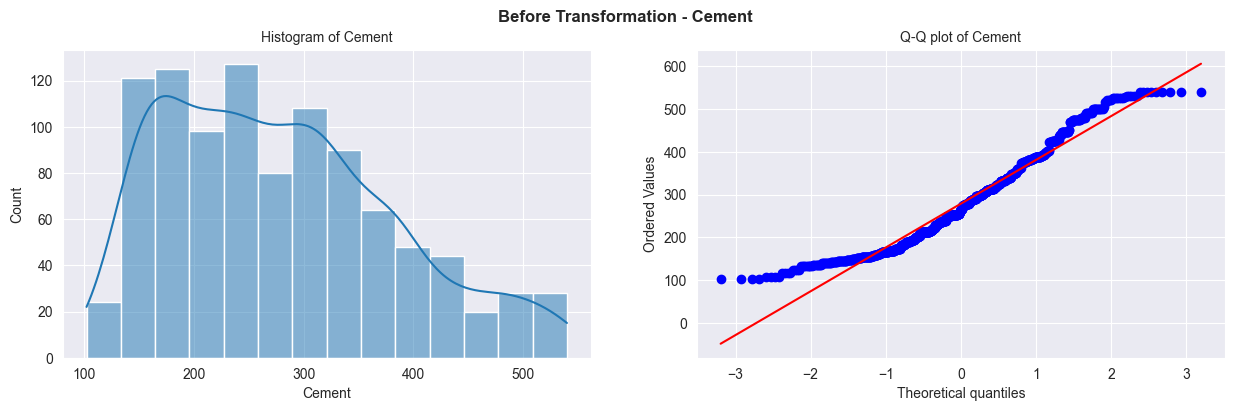

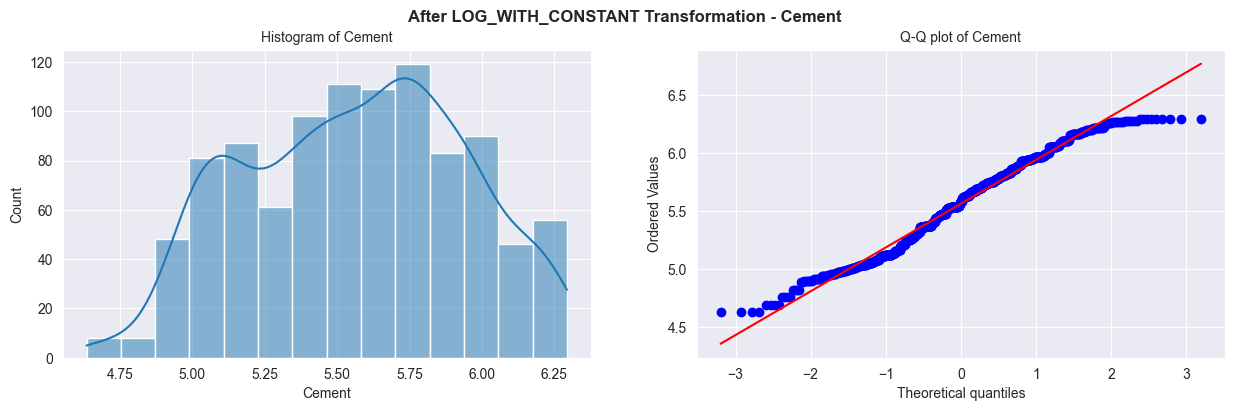

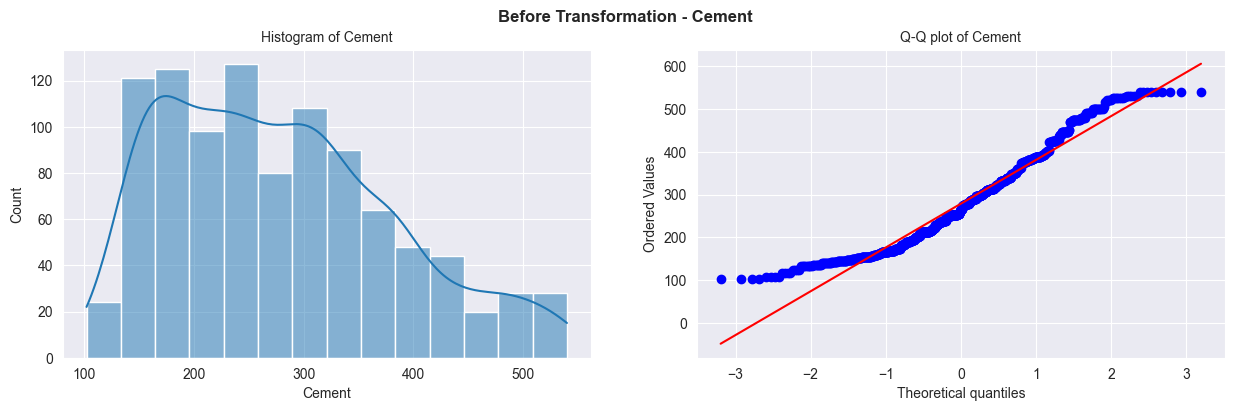

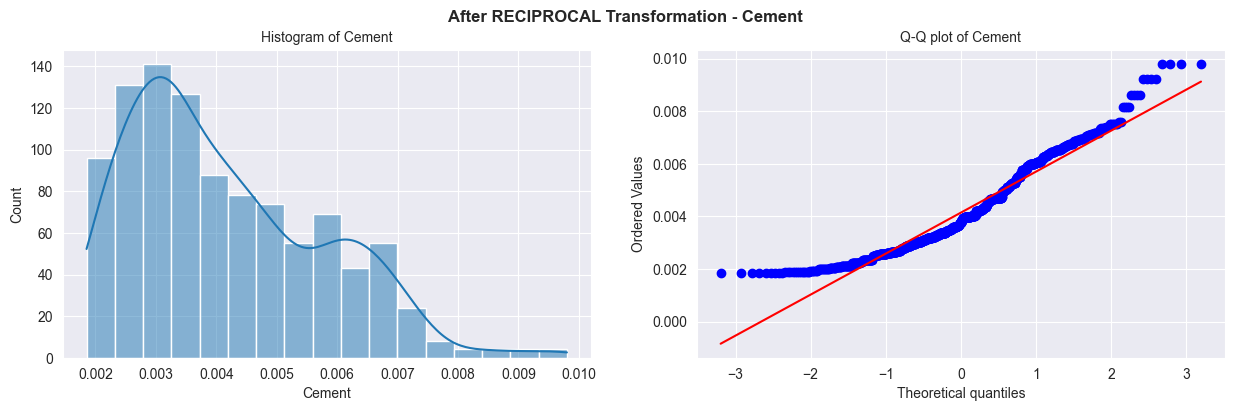

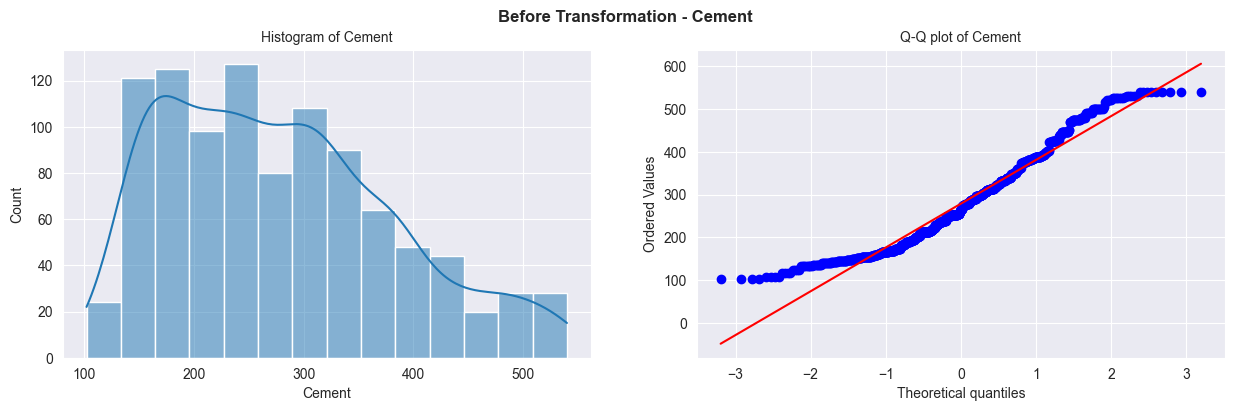

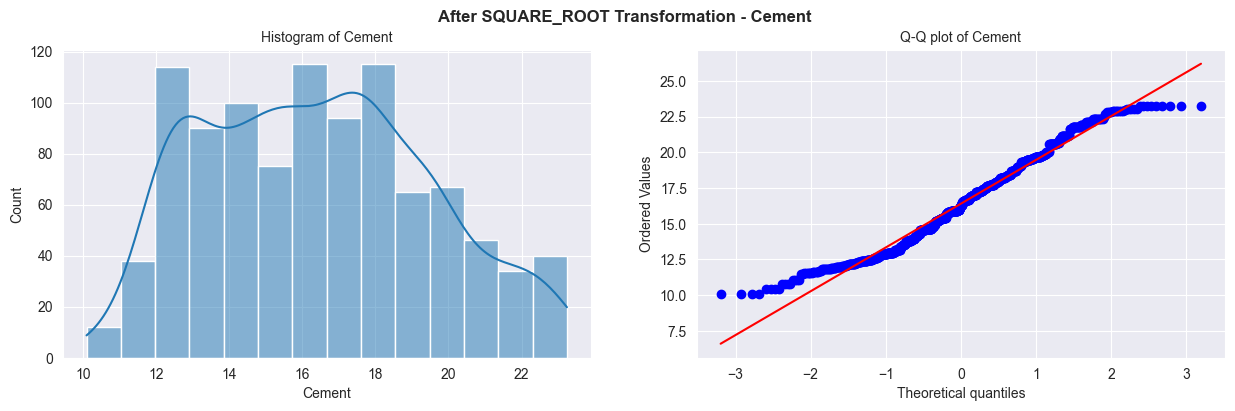

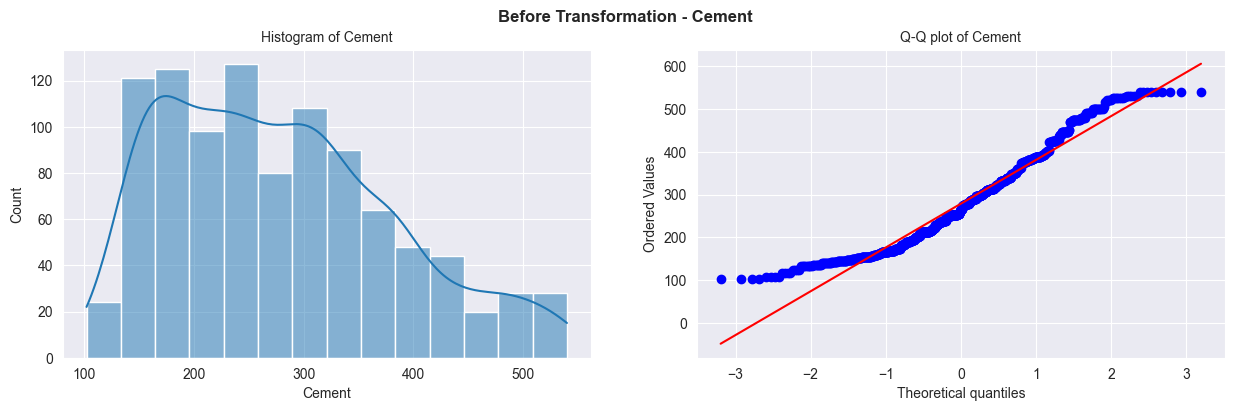

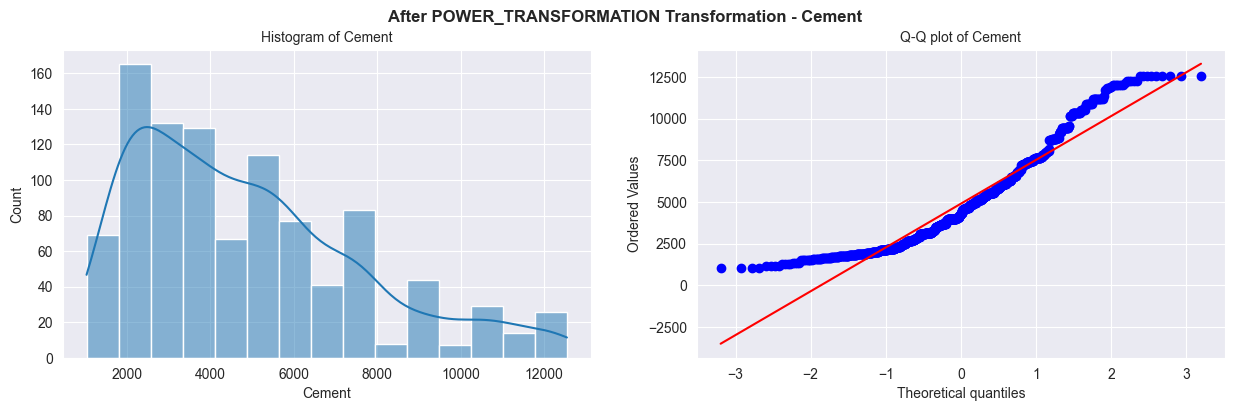

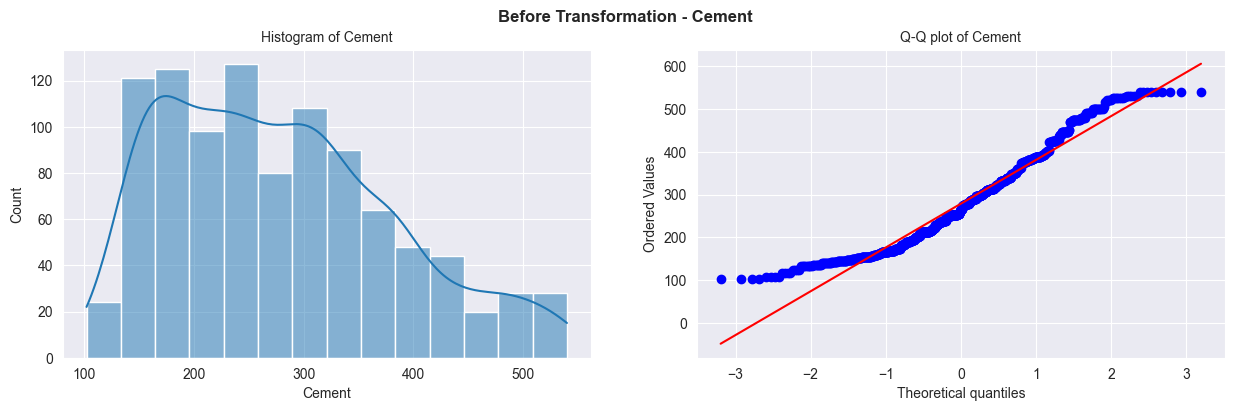

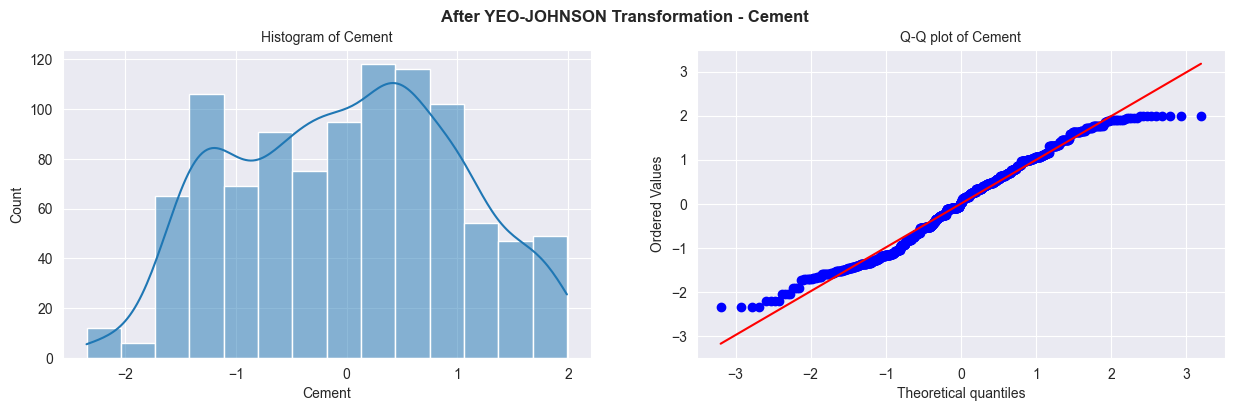

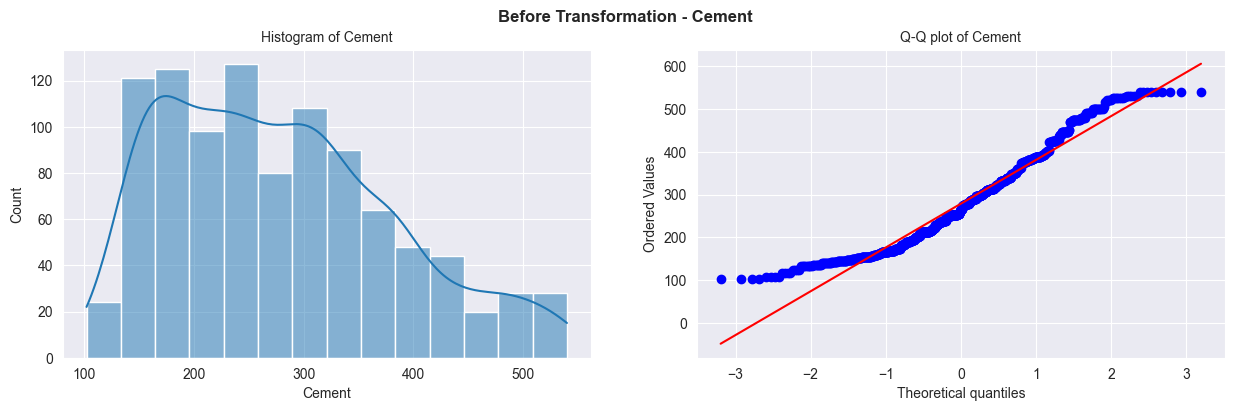

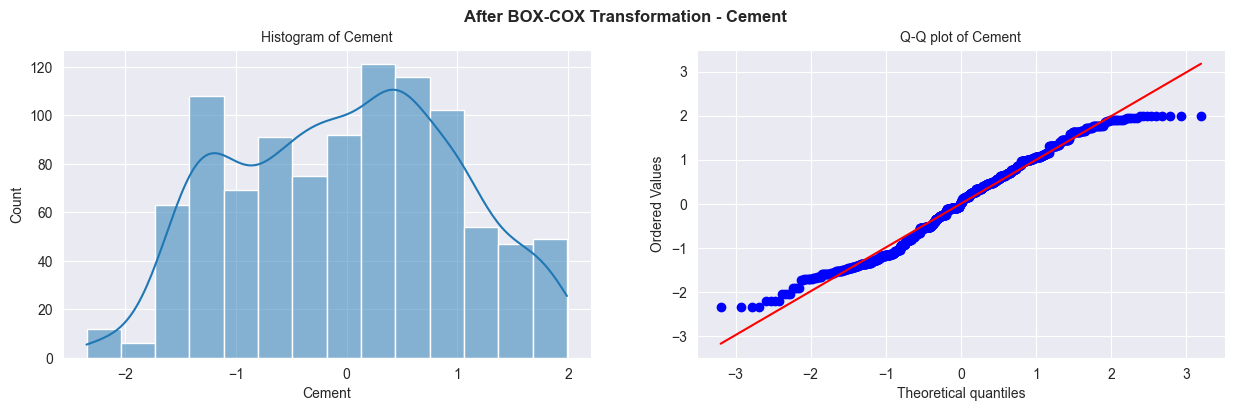

In [25]:
all_transformations('Cement')

**Cement** is right skewed, so we need to perform transformation.

After trying all the possible methods, **Yeo-Johnson** provides the best result.

### Furnace Slag

Furnace_Slag contains less than zero values, so we cannot perform box-cox transformation on this variable


Transformation Name  Skewness
5           Yeo-Johnson  0.008614
6               Box-Cox  0.008614
1     log_with_constant  0.011218
2            Reciprocal  0.129818
3           square_root  0.304763
0              Original  0.853654
4  Power_Transformation  1.467529

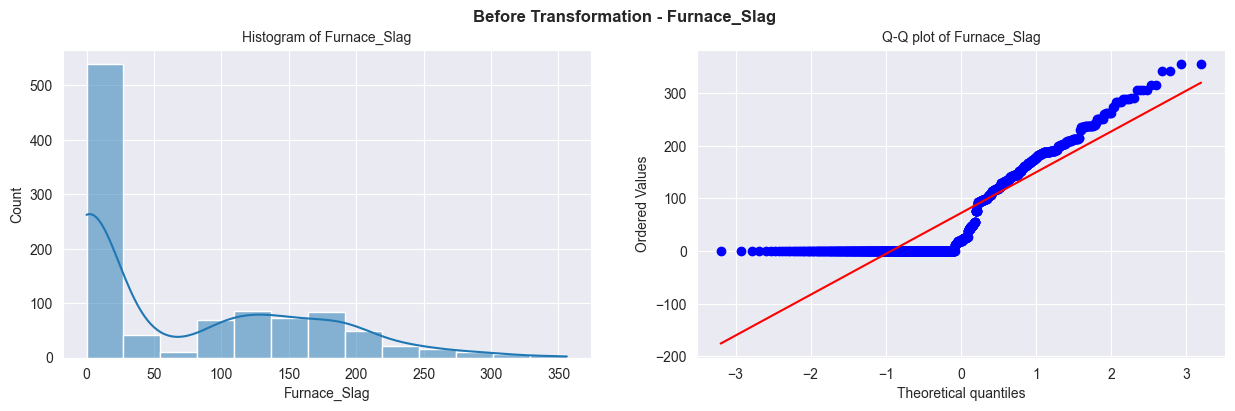

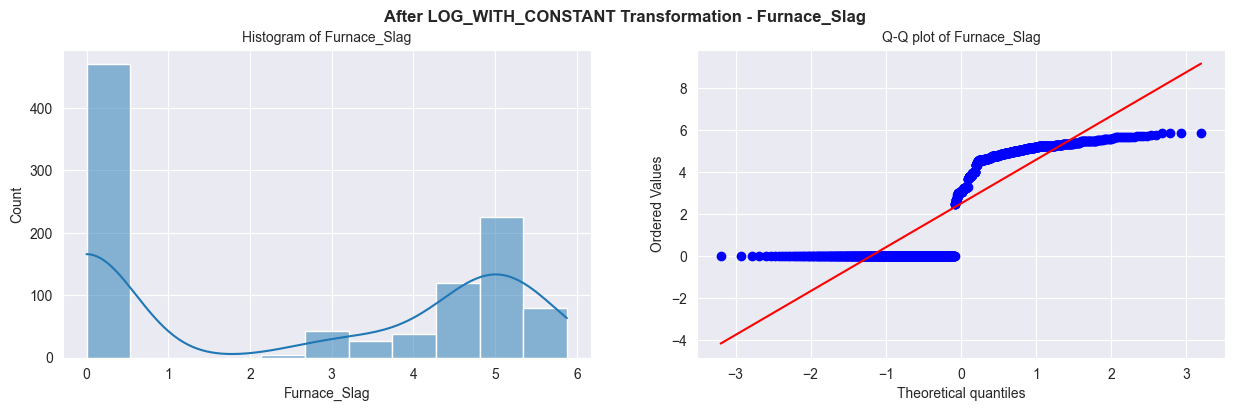

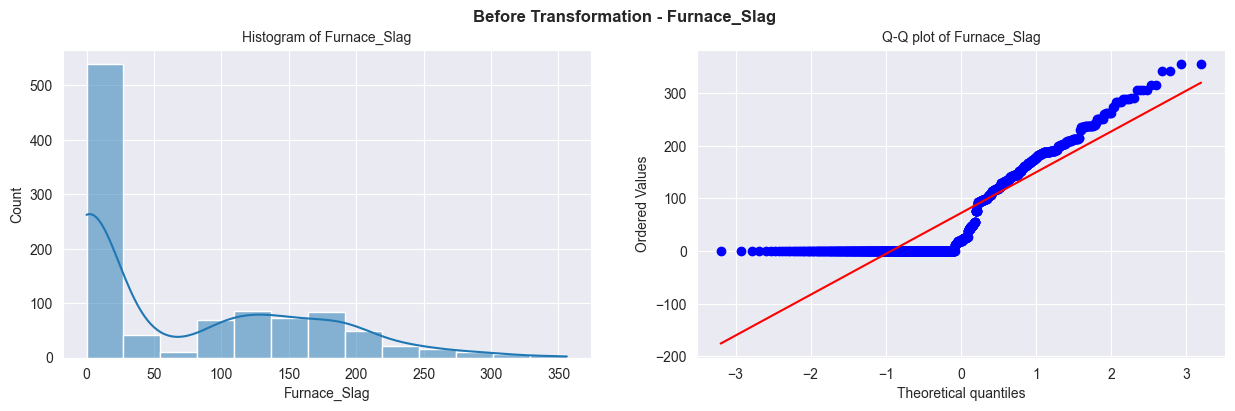

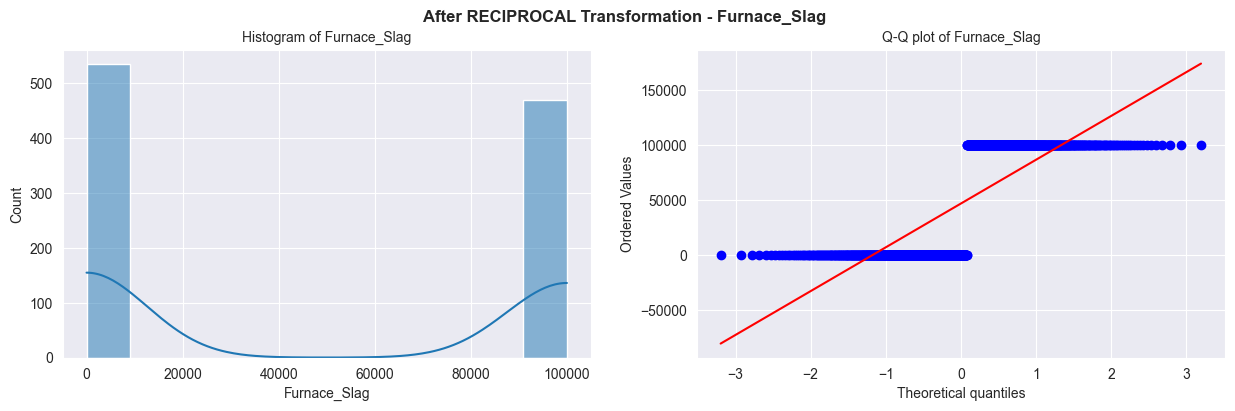

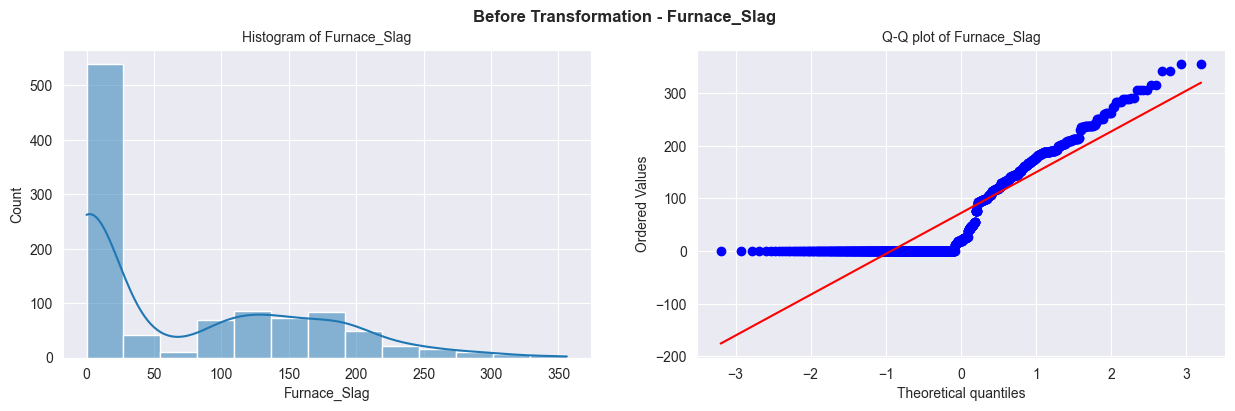

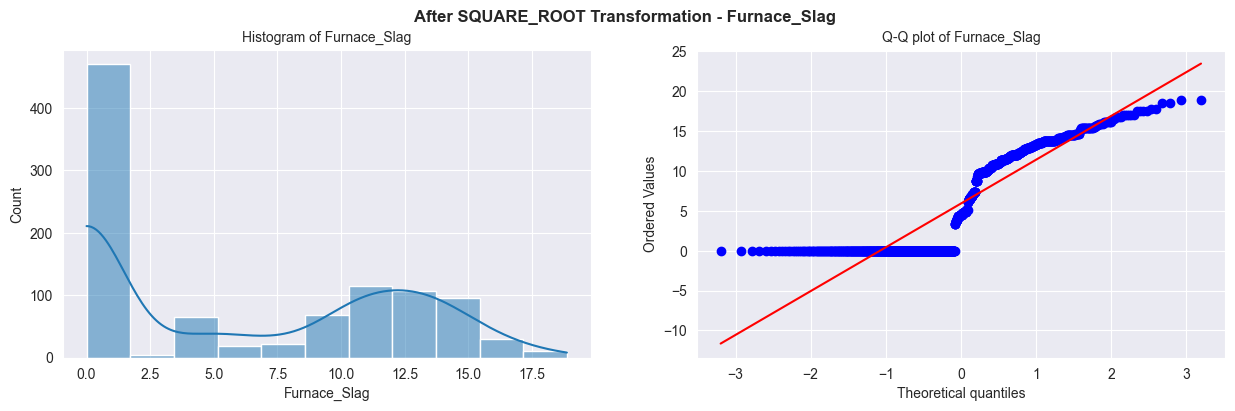

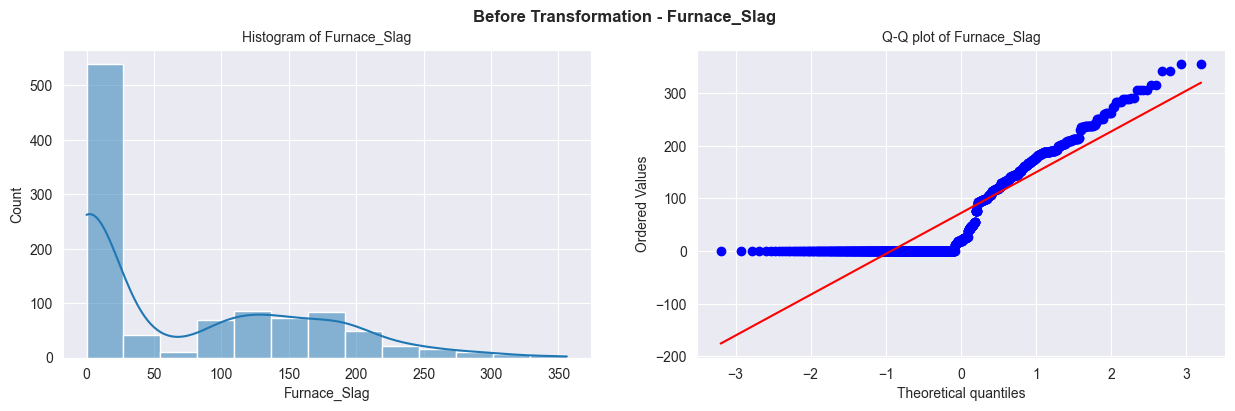

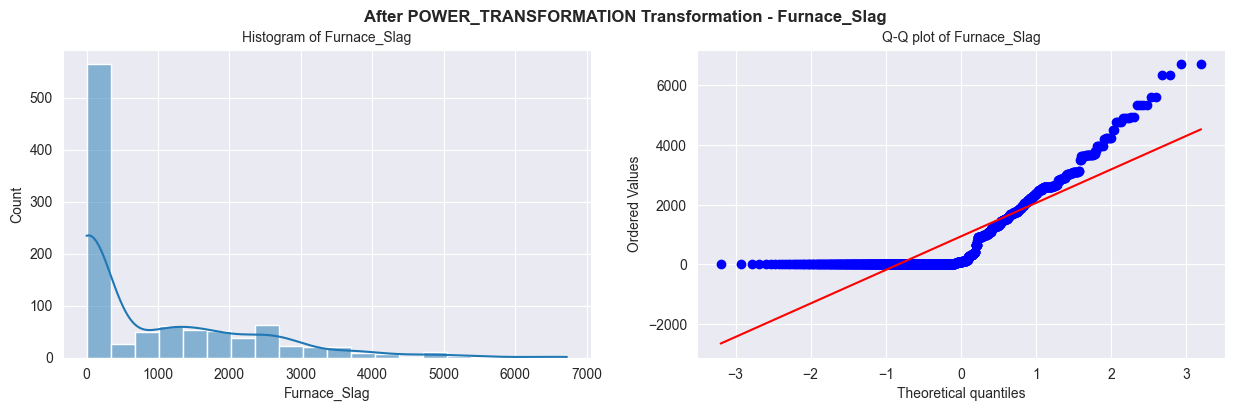

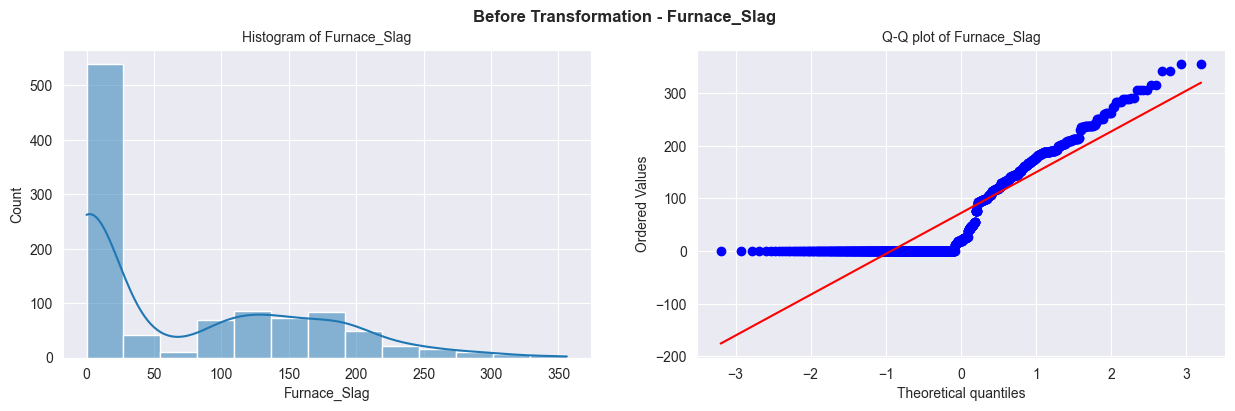

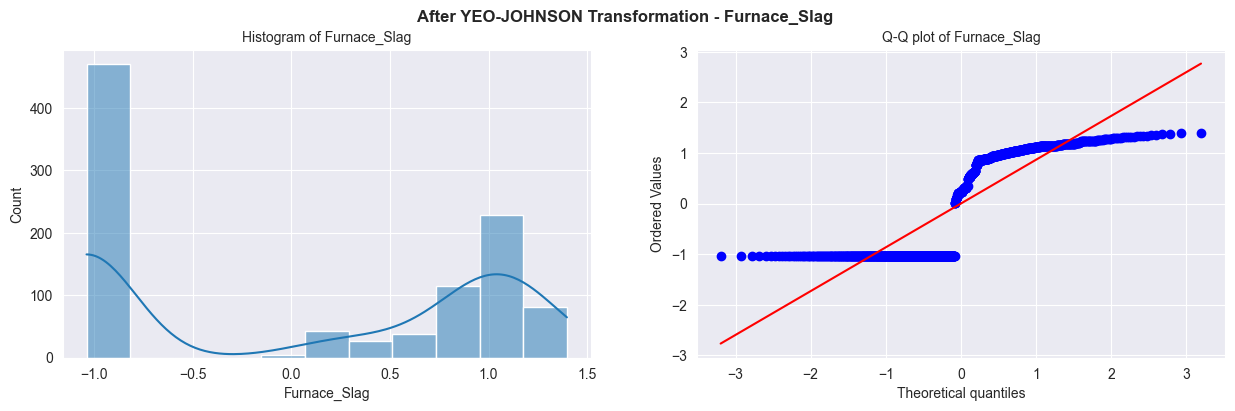

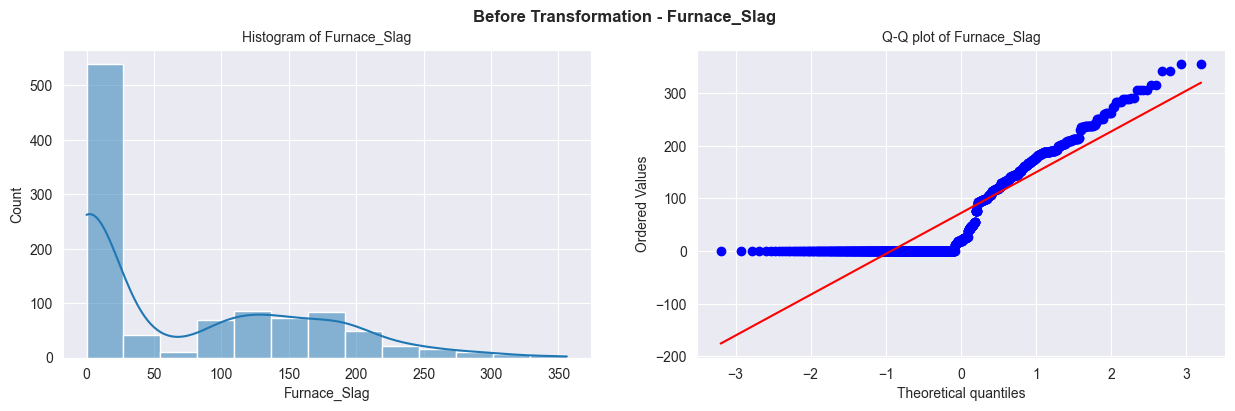

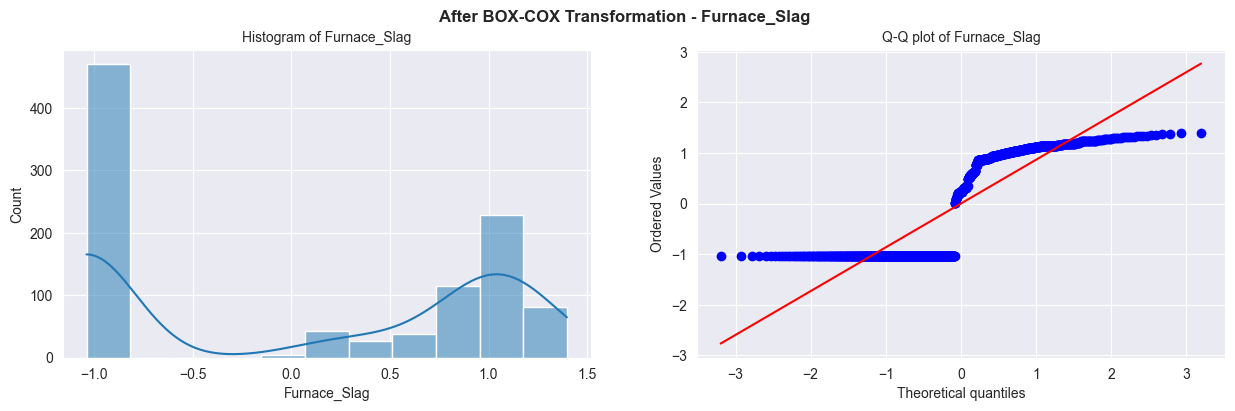

In [24]:
all_transformations('Furnace_Slag')

For **Furnace-Slag**, **Yeo-Johnson** performs best as it reduces skewness from 0.8 to -0.025 (closer to zero)

### Fly_Ash

Fly_Ash contains less than zero values, so we cannot perform box-cox transformation on this variable


Transformation Name  Skewness
2            Reciprocal -0.153915
5           Yeo-Johnson  0.172062
6               Box-Cox  0.172062
1     log_with_constant  0.181734
3           square_root  0.264466
0              Original  0.497231
4  Power_Transformation  0.817231

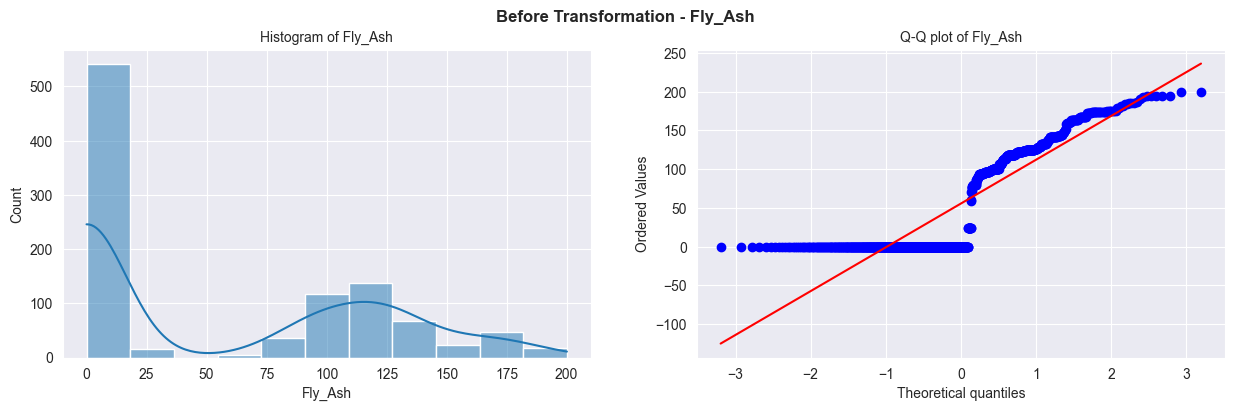

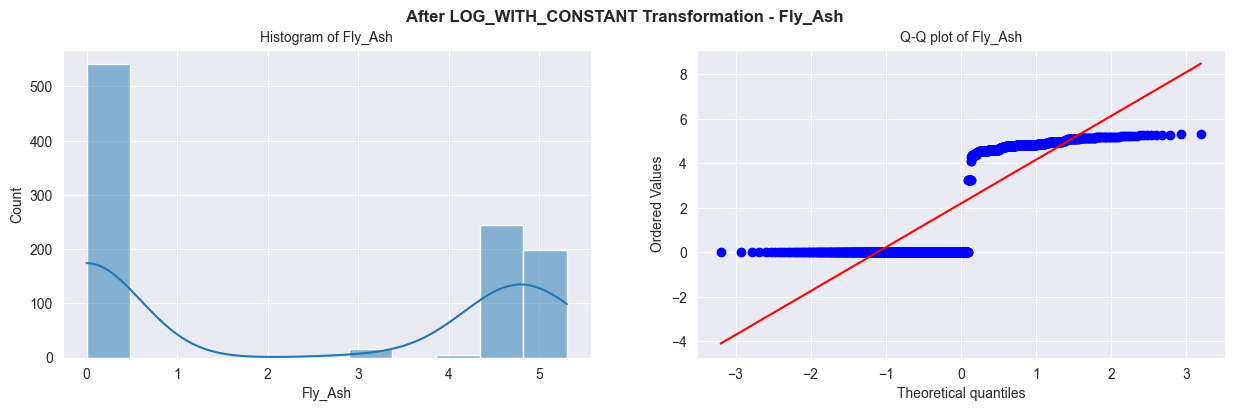

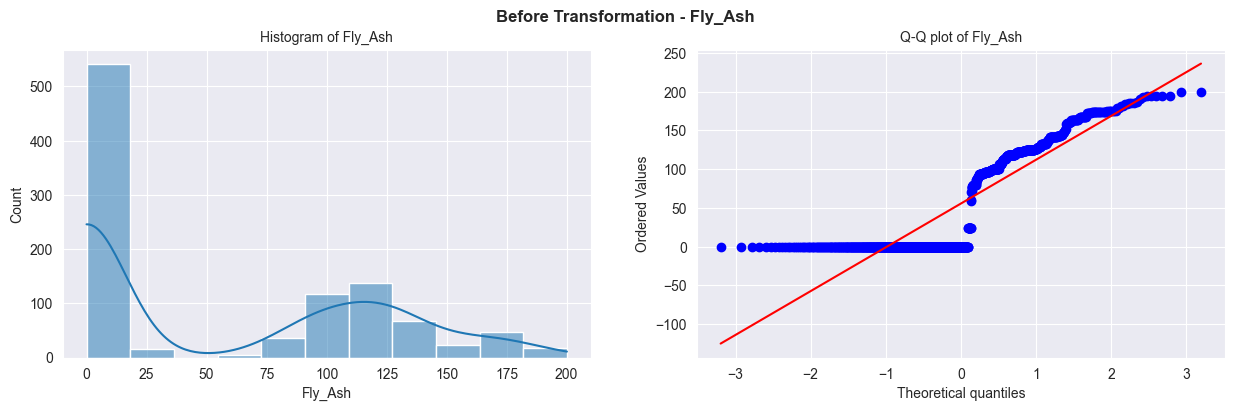

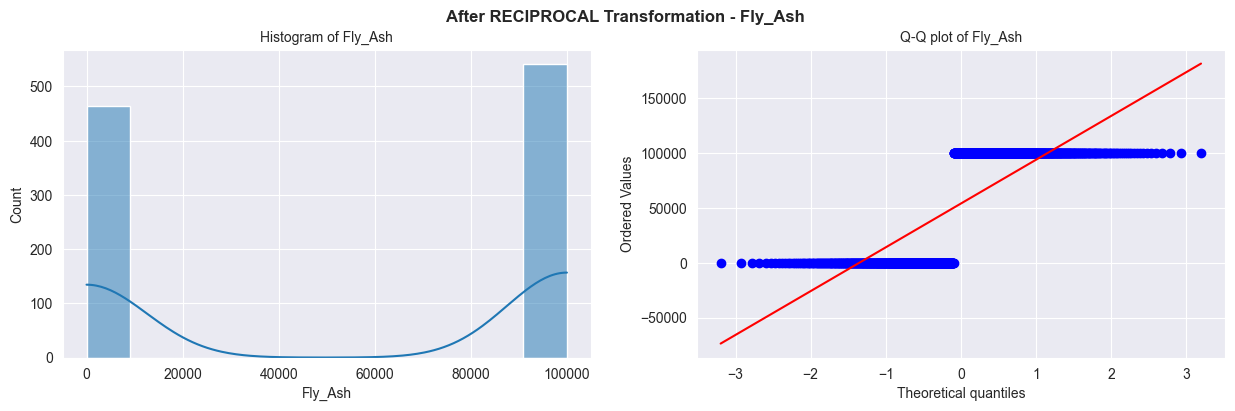

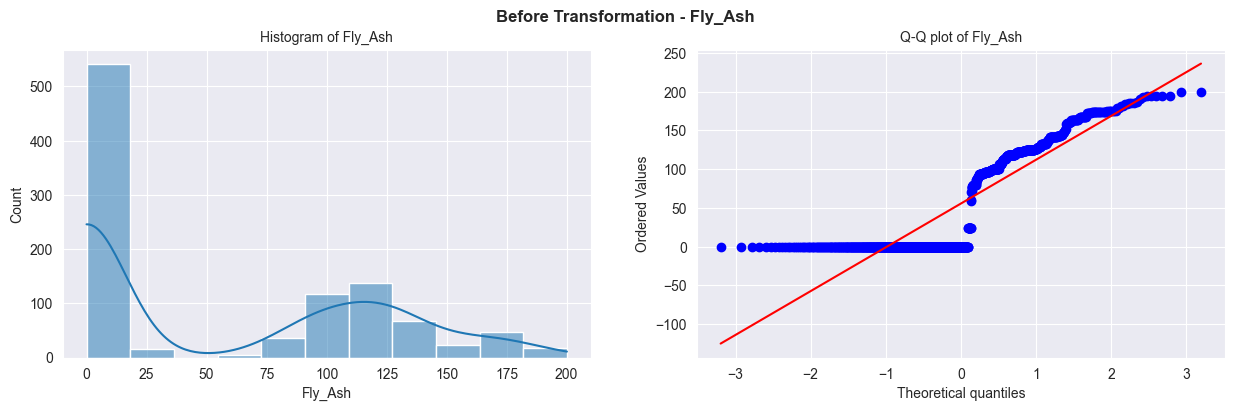

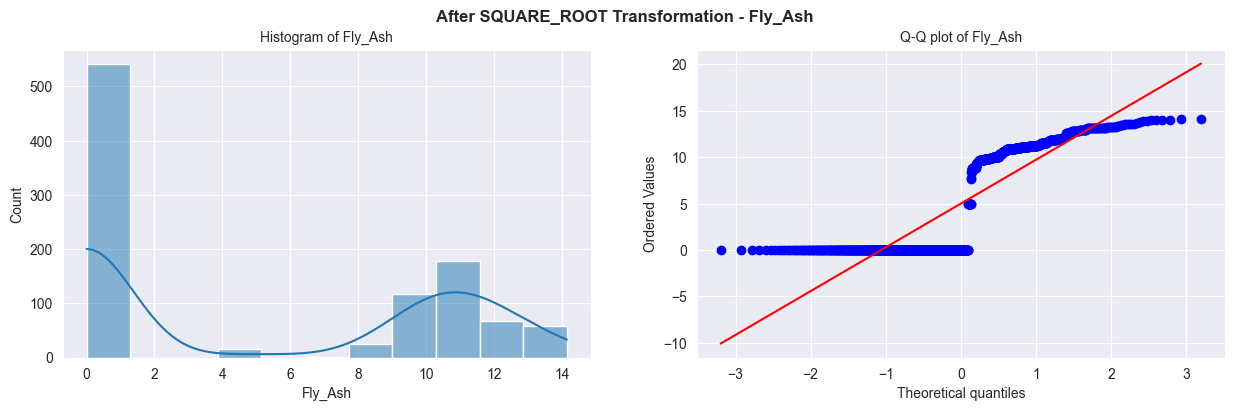

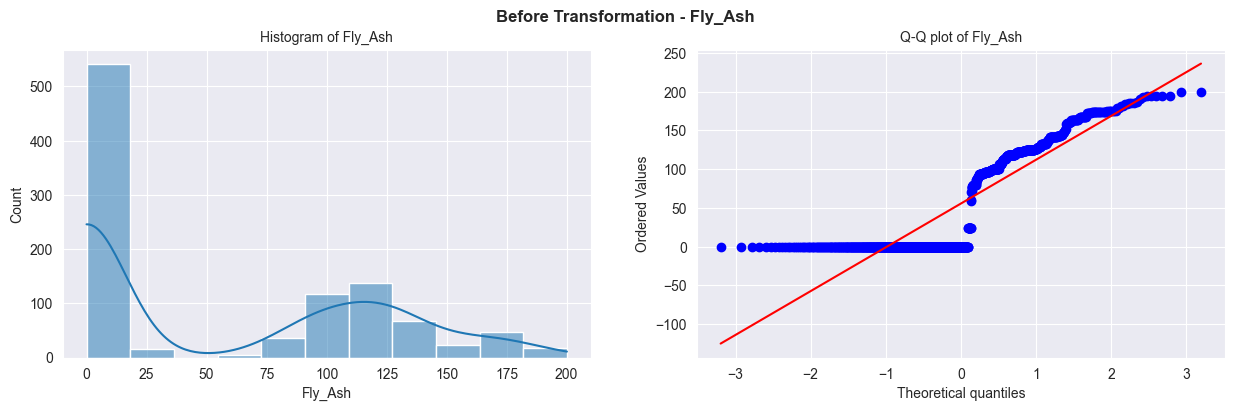

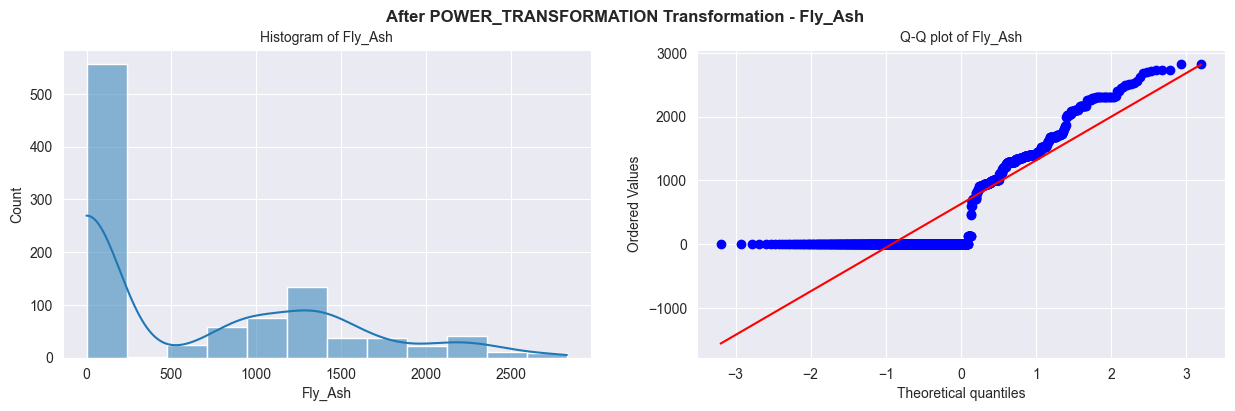

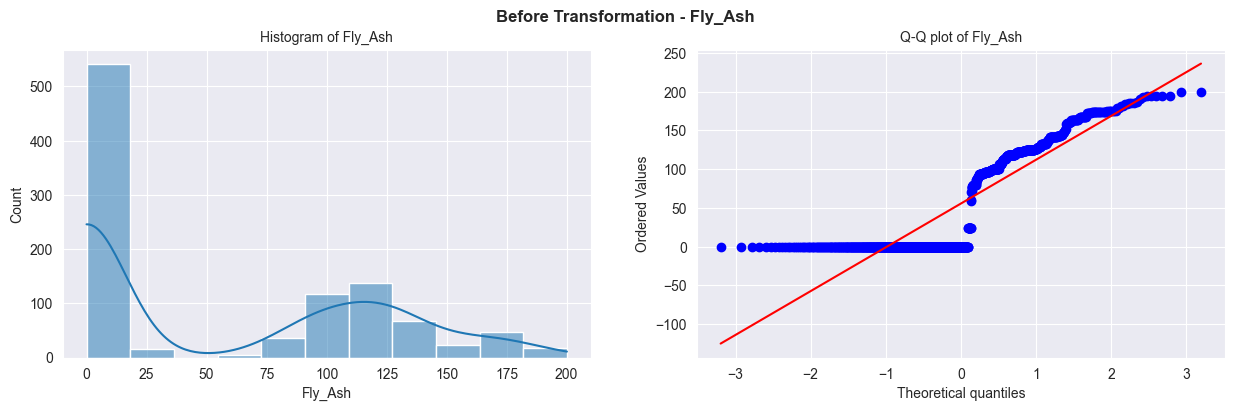

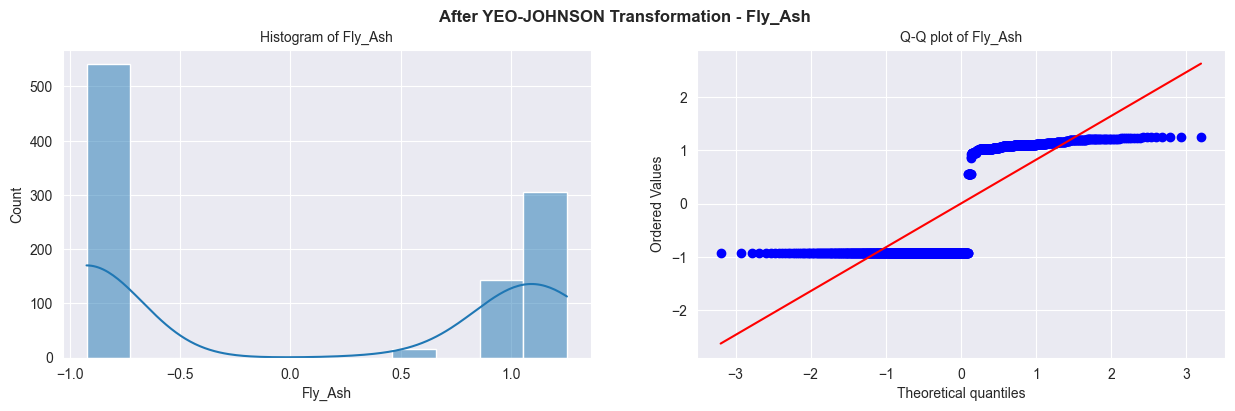

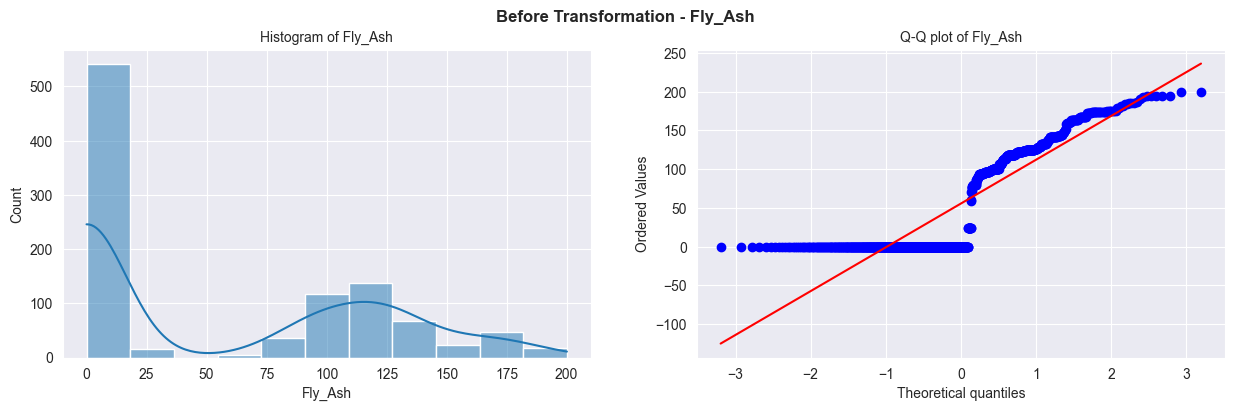

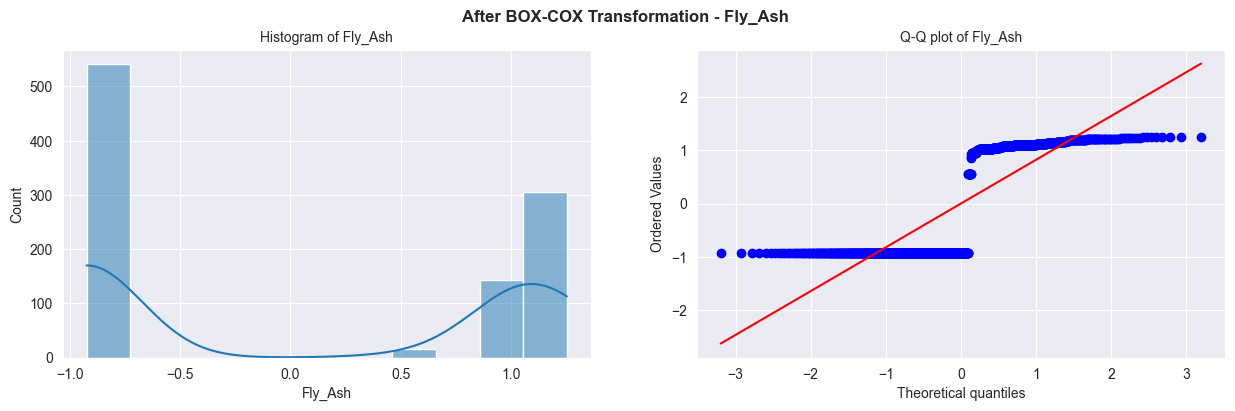

In [26]:
all_transformations('Fly_Ash')

No transformation works best for **Fly Ash**

### Water

Transformation Name  Skewness
6               Box-Cox  0.000023
5           Yeo-Johnson  0.000027
0              Original  0.028784
3           square_root -0.149400
4  Power_Transformation  0.205165
1     log_with_constant -0.327269
2            Reciprocal  0.700108

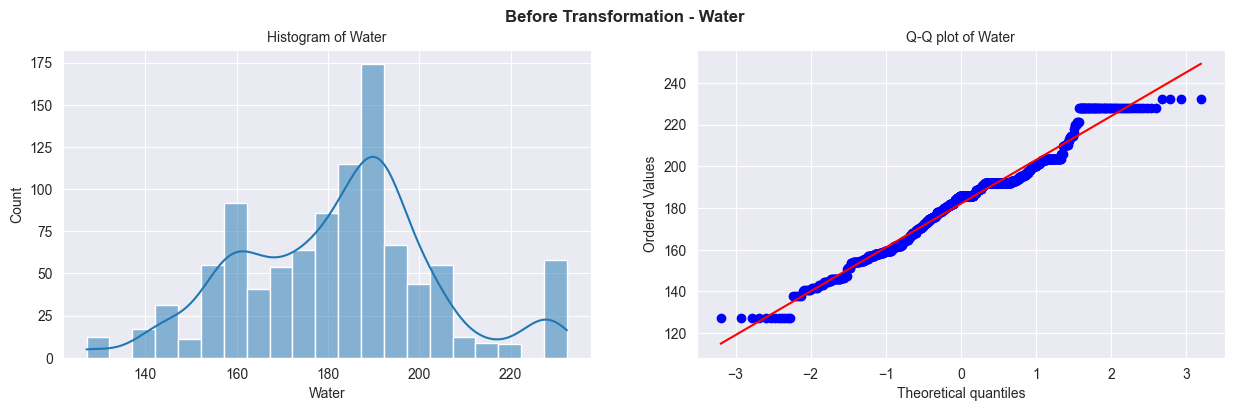

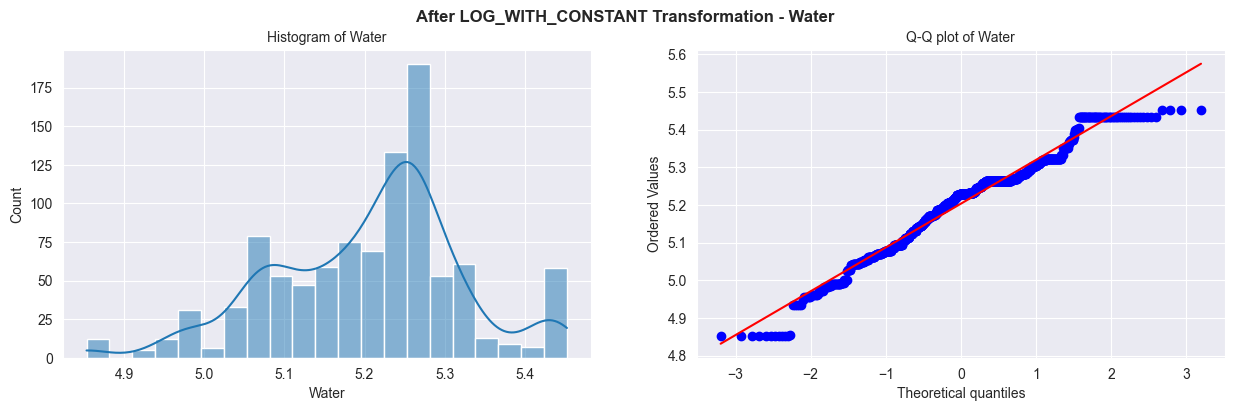

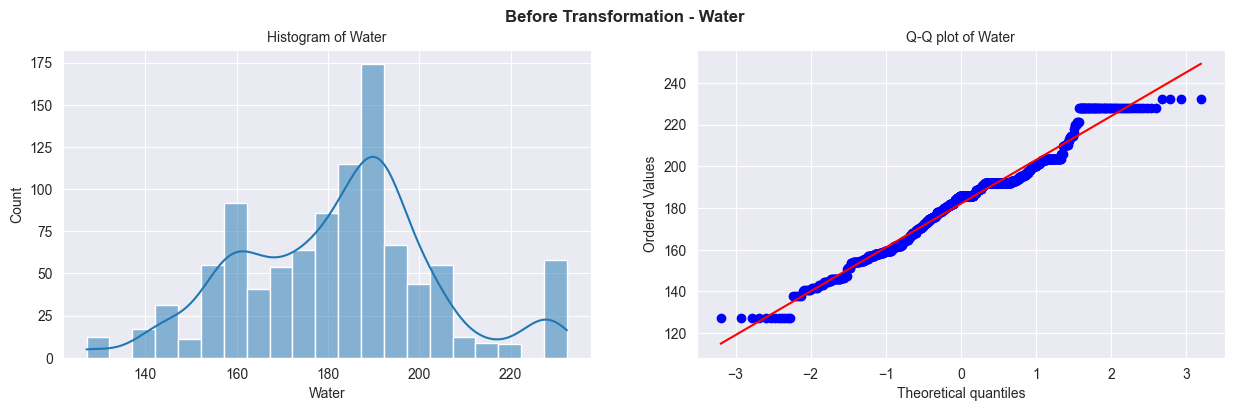

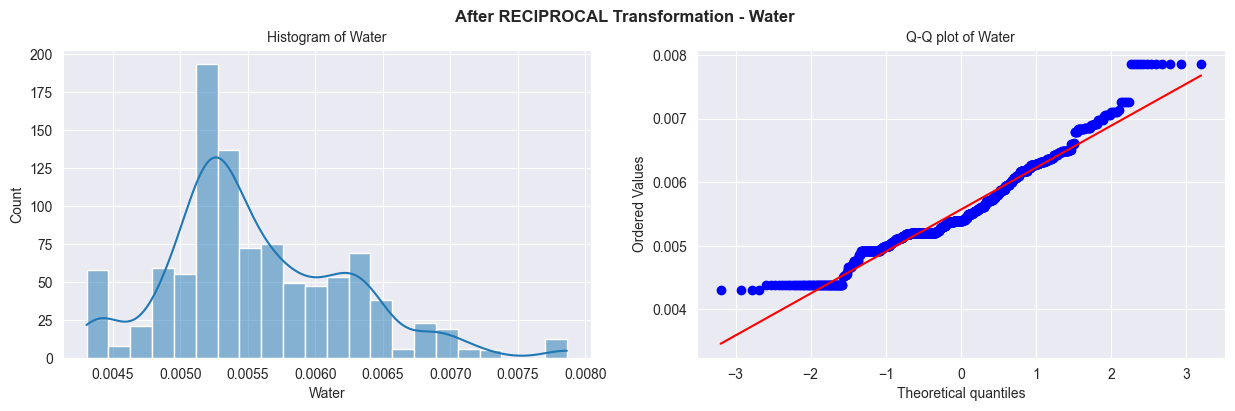

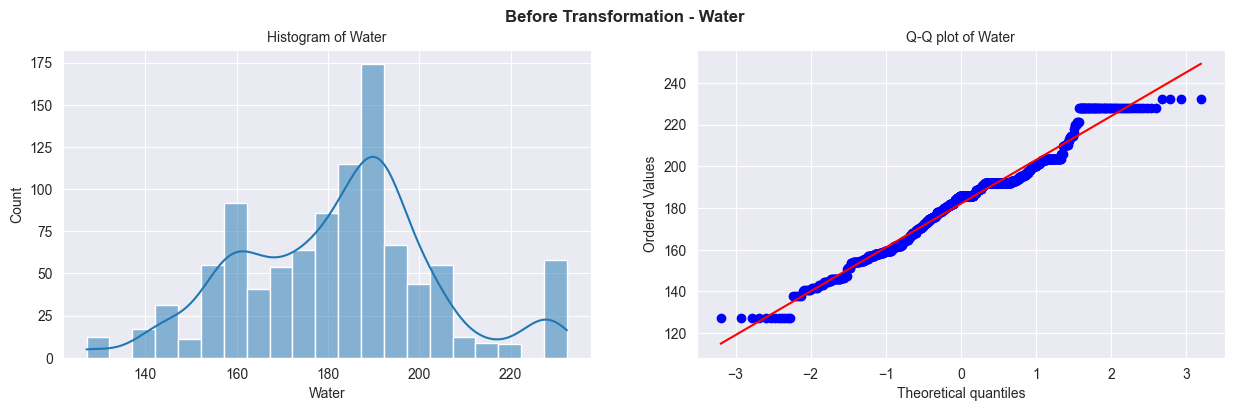

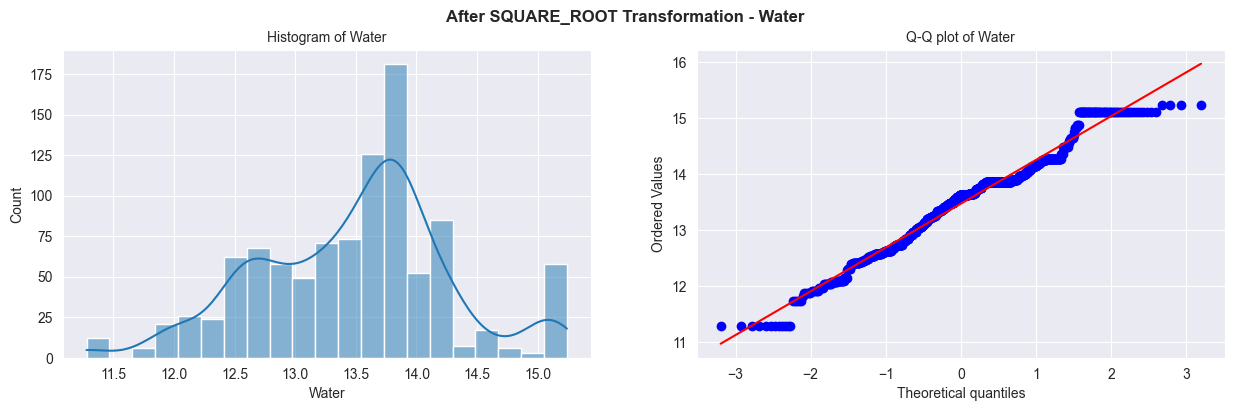

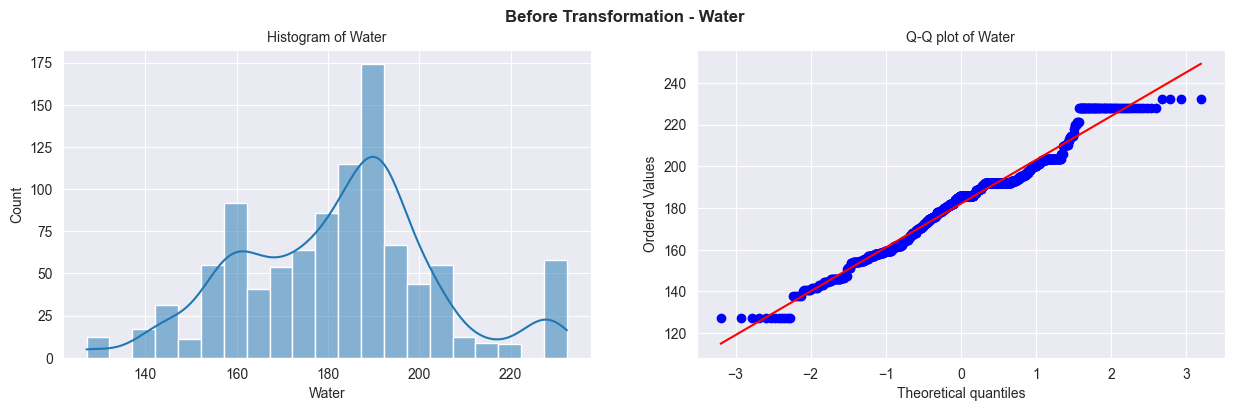

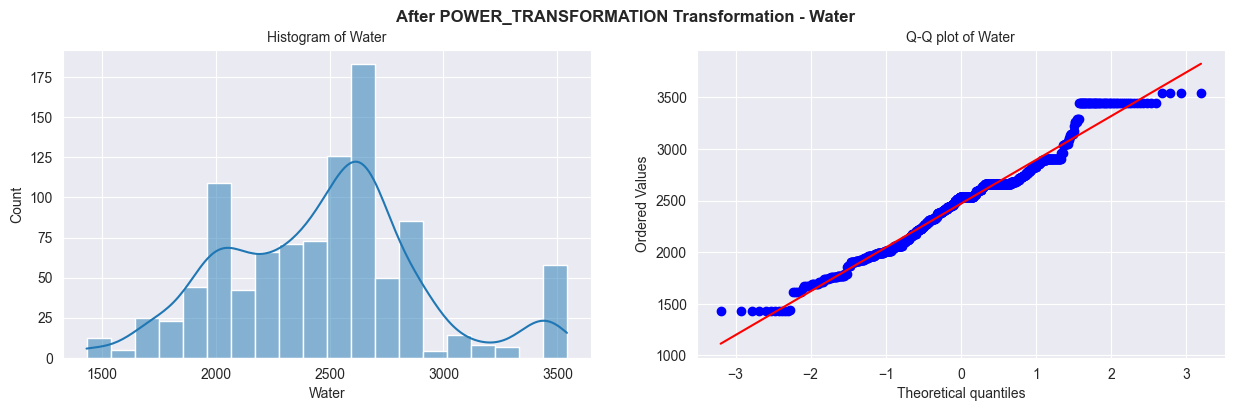

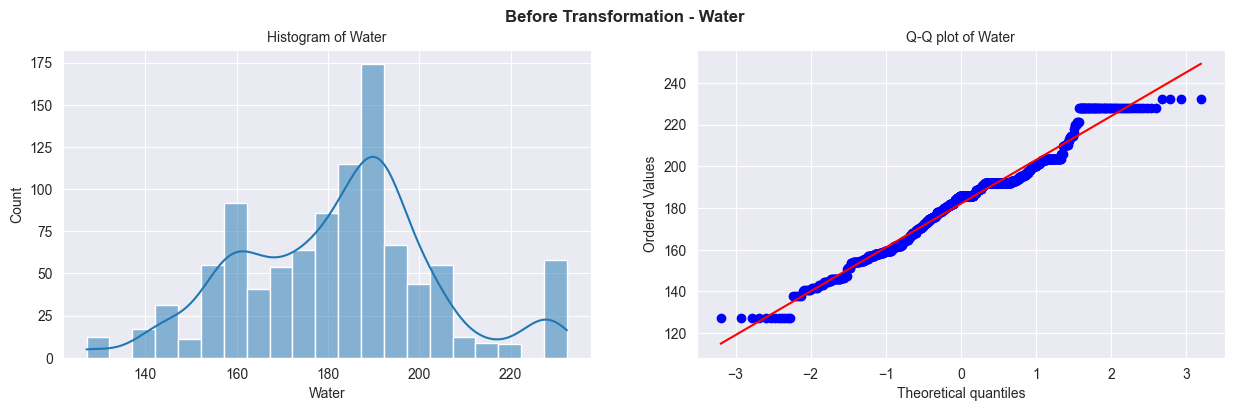

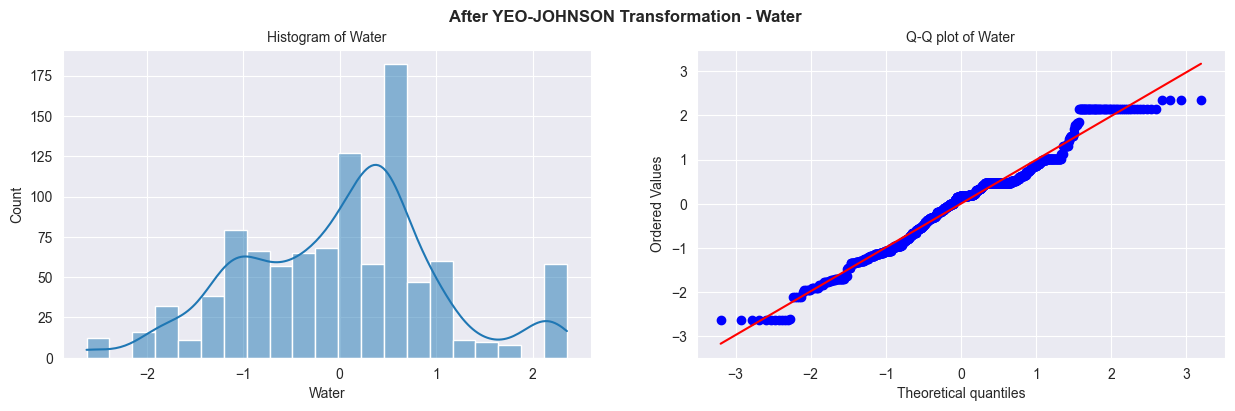

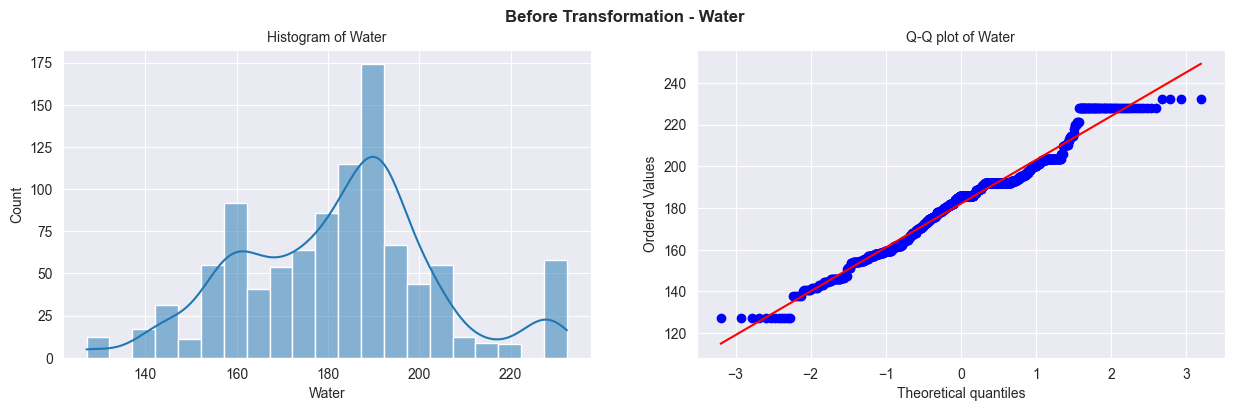

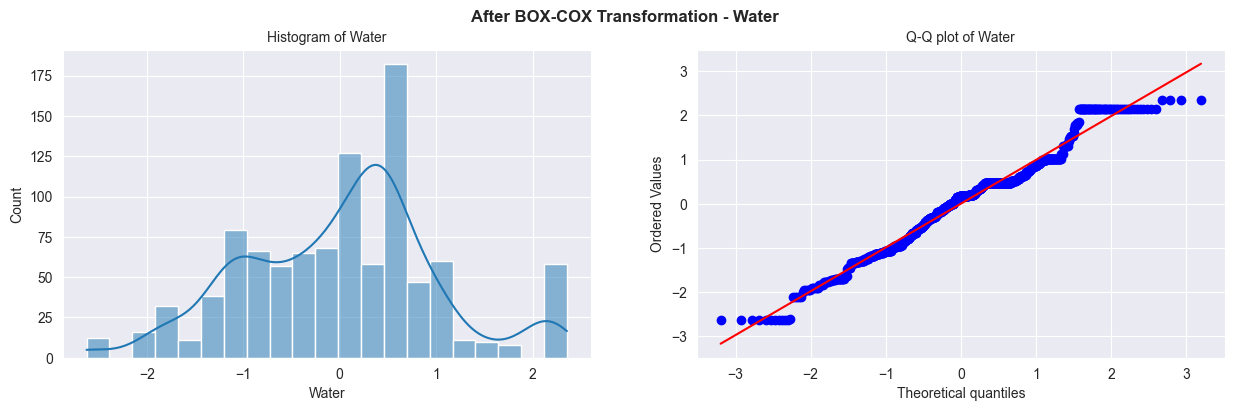

In [27]:
all_transformations('Water')

Both **Yeo-Johnson** and **Box-Cox** works best for ***Water***

### Superplasticizer

Superplasticizer contains less than zero values, so we cannot perform box-cox transformation on this variable


Transformation Name  Skewness
5           Yeo-Johnson -0.160514
6               Box-Cox -0.160514
3           square_root -0.163482
1     log_with_constant -0.301580
2            Reciprocal  0.512234
0              Original  0.708386
4  Power_Transformation  1.861147

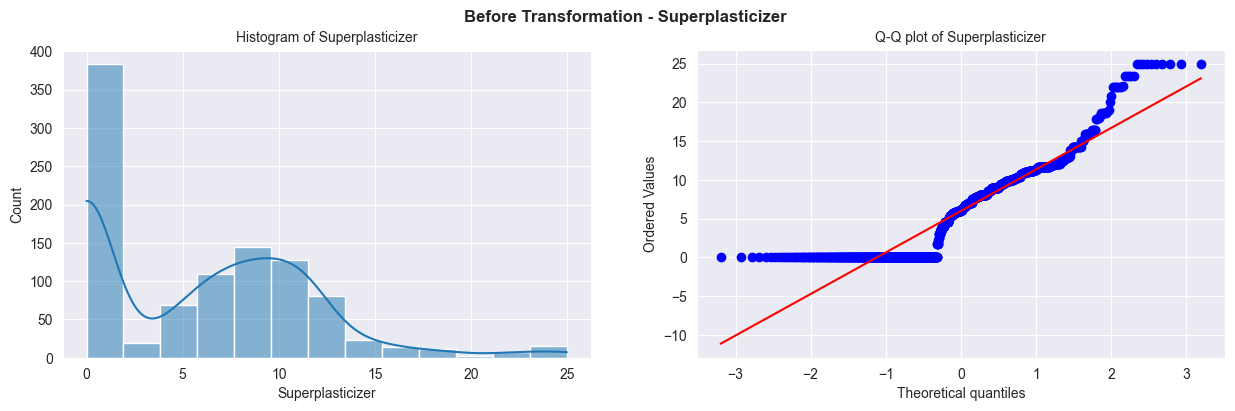

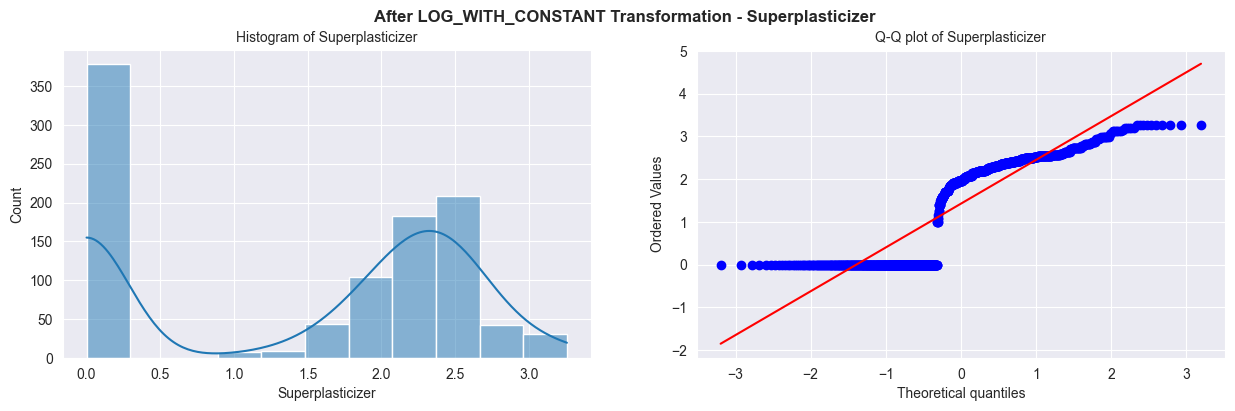

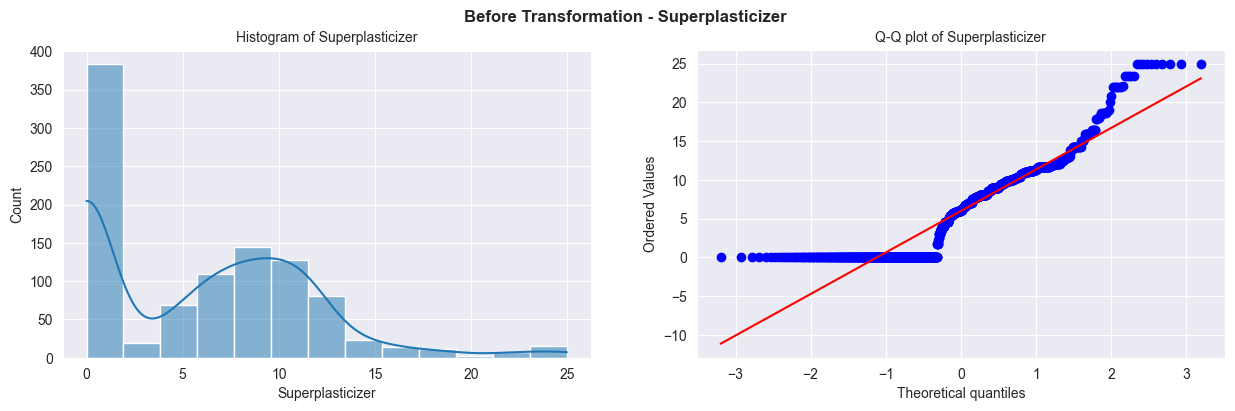

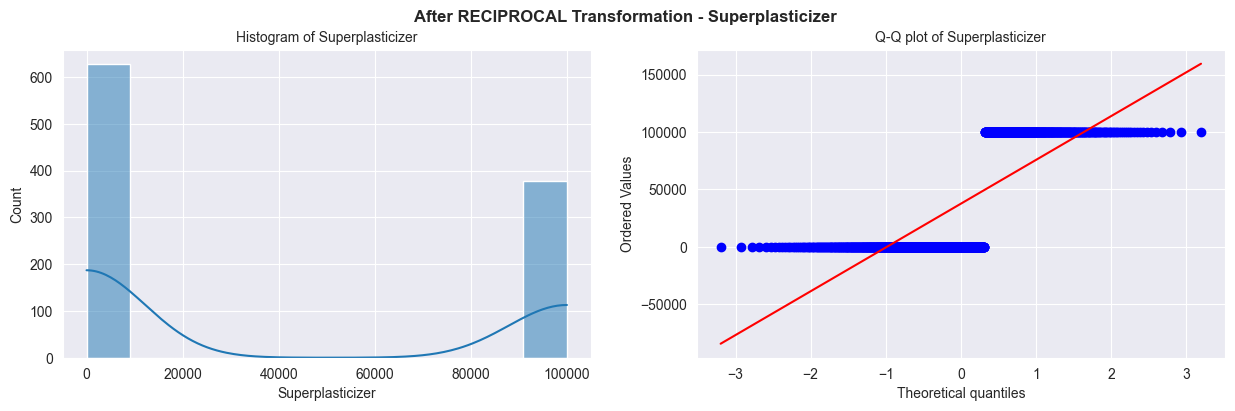

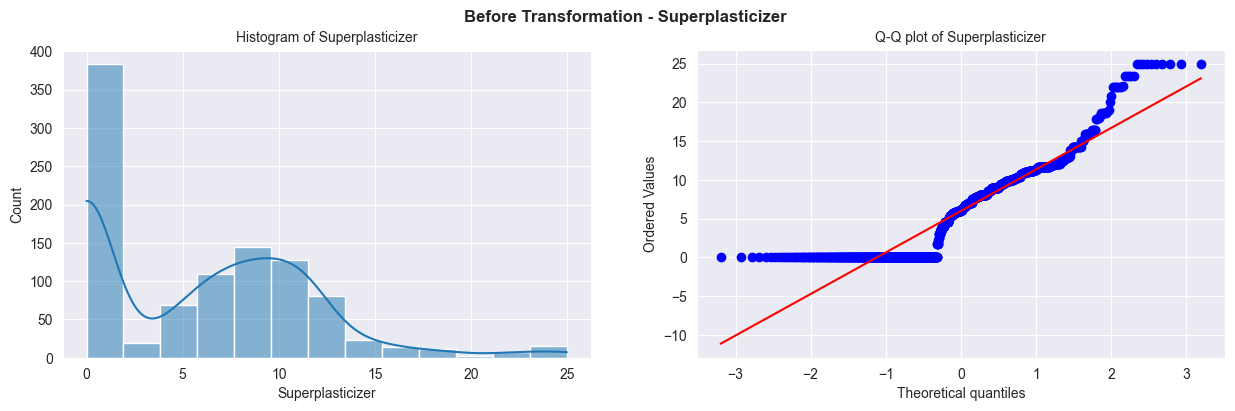

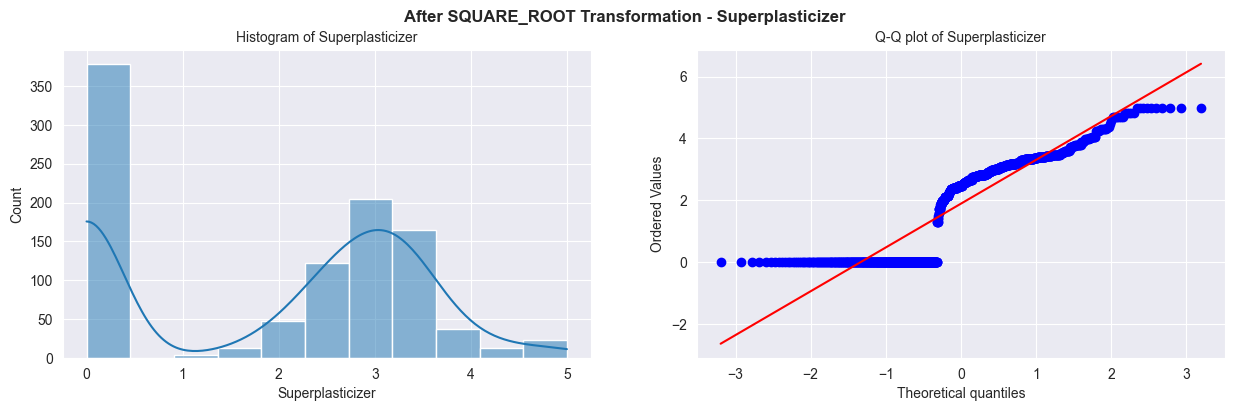

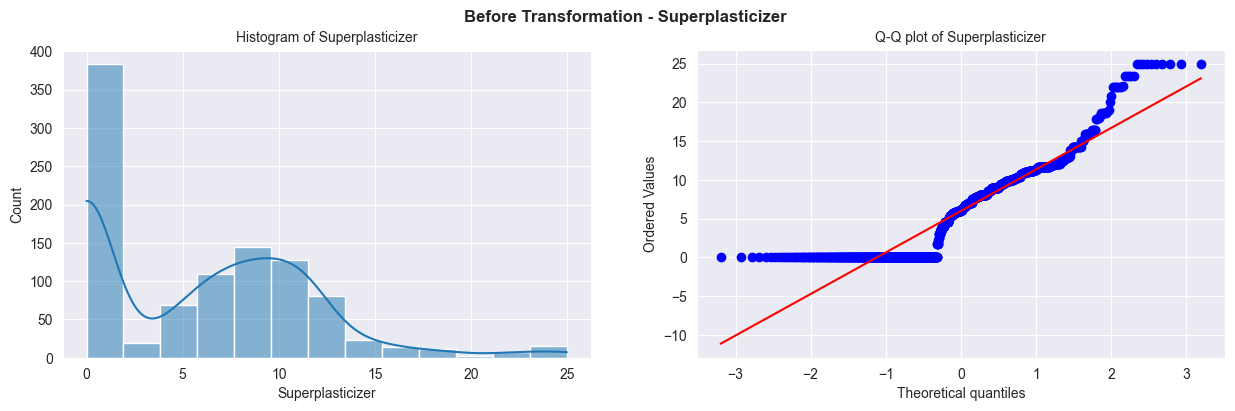

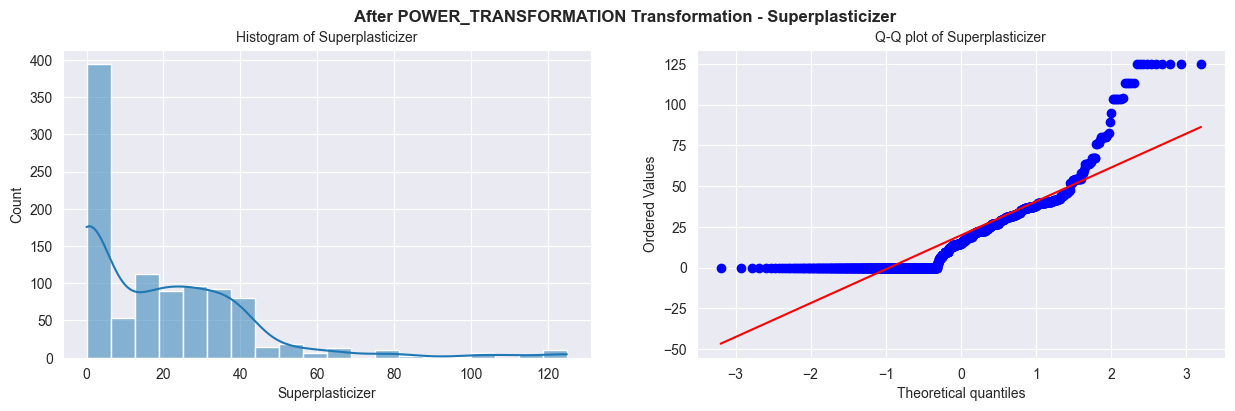

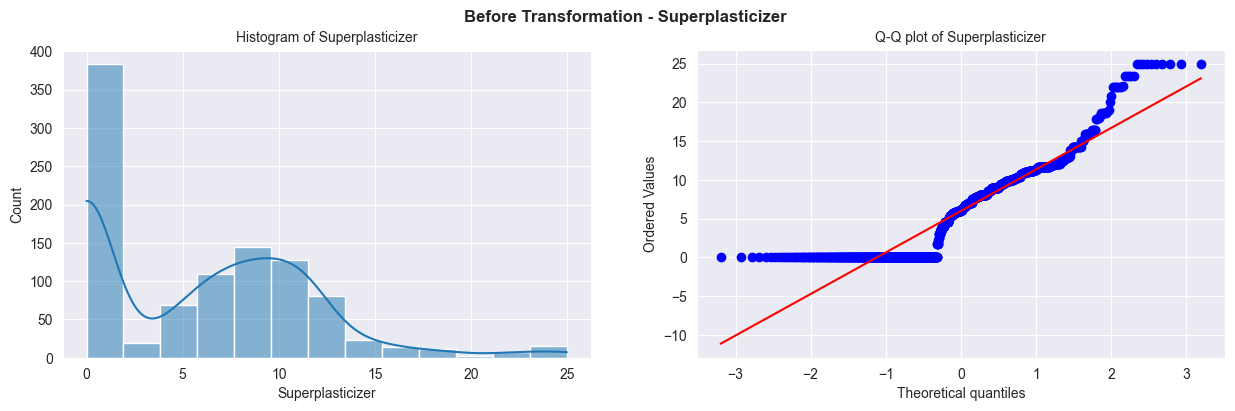

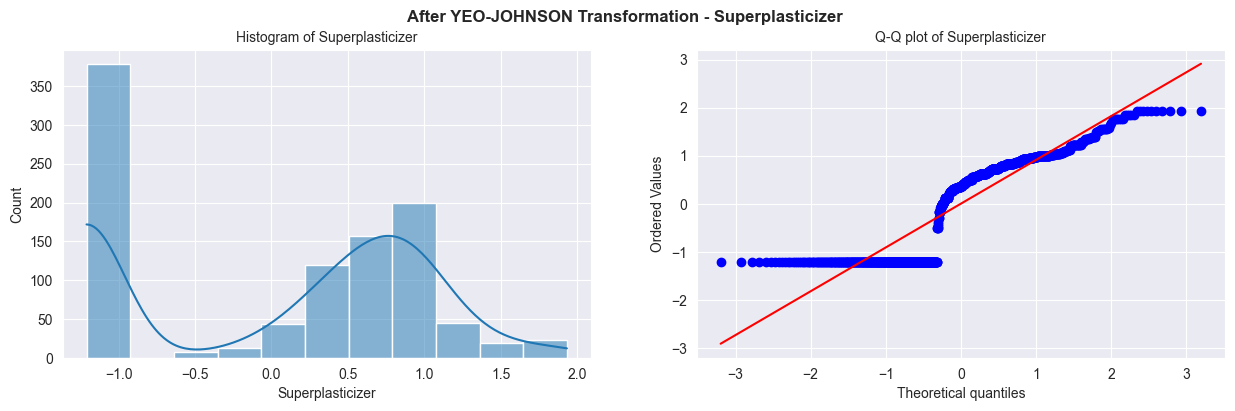

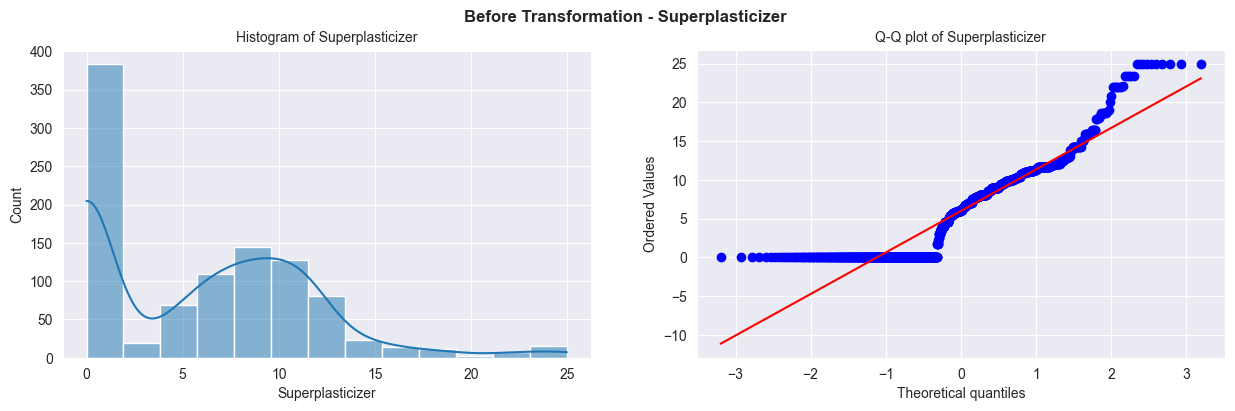

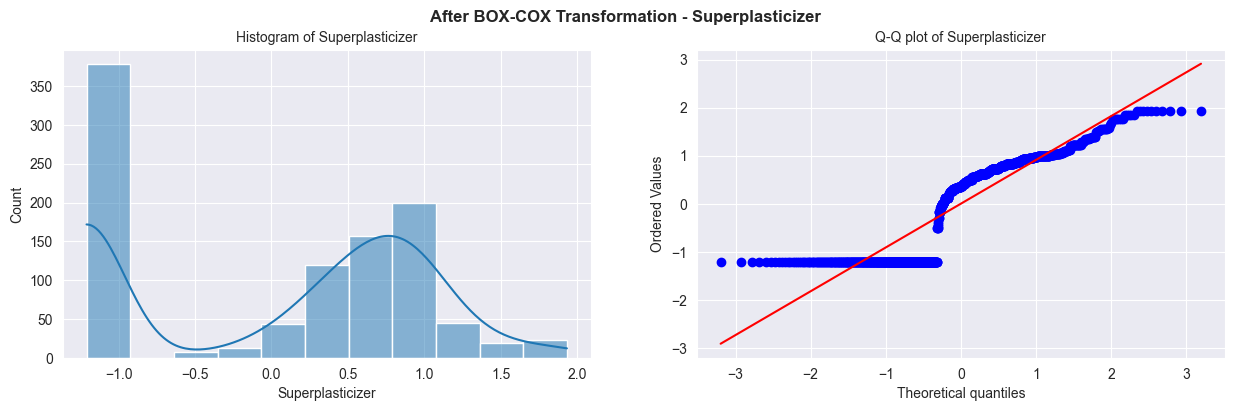

In [28]:
all_transformations('Superplasticizer')

For Superplasticizer, **Yeo-Johnson** works best.

### Coarse_Aggregate

Transformation Name  Skewness
4  Power_Transformation  0.019265
5           Yeo-Johnson -0.020276
6               Box-Cox -0.020292
0              Original -0.065256
3           square_root -0.149821
1     log_with_constant -0.236282
2            Reciprocal  0.409874

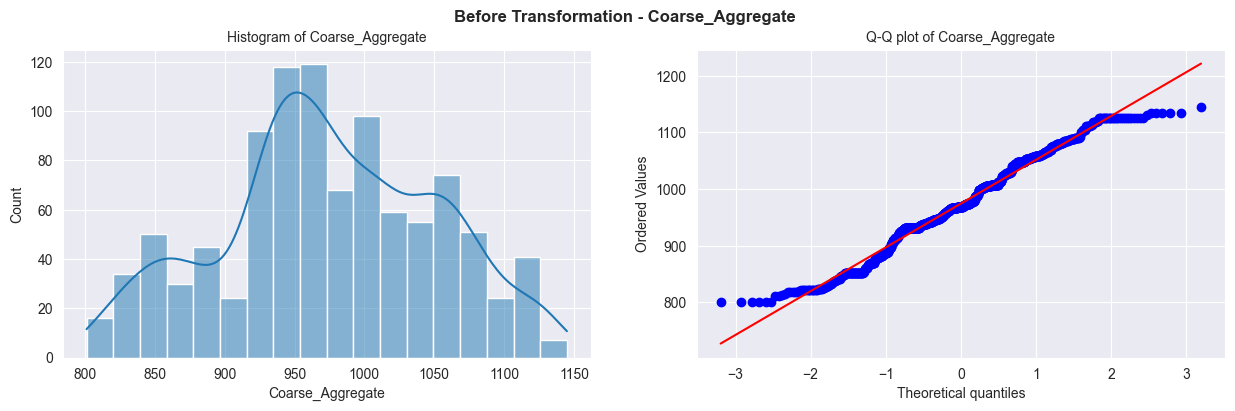

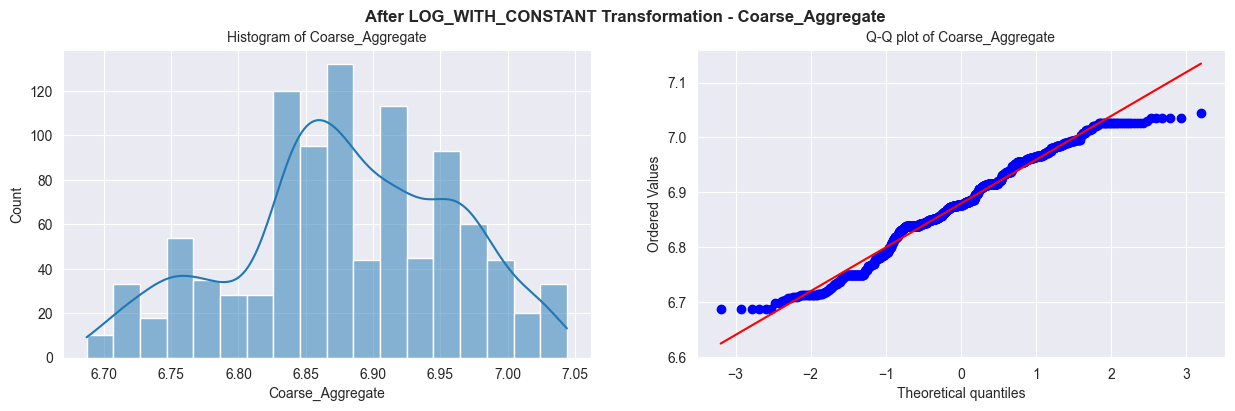

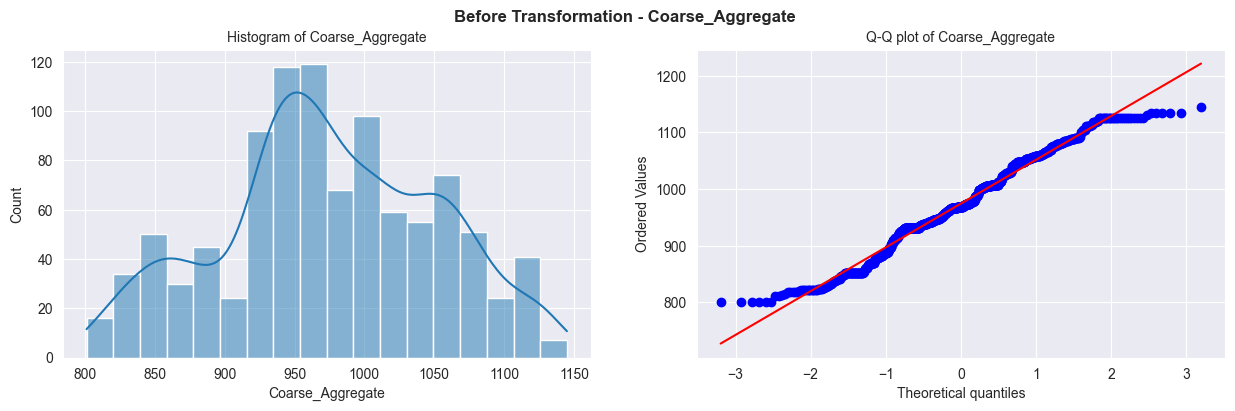

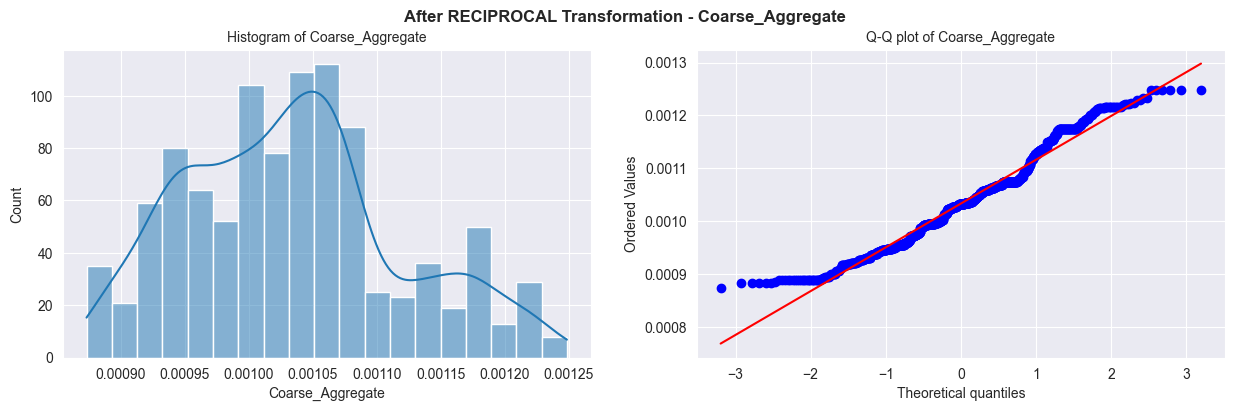

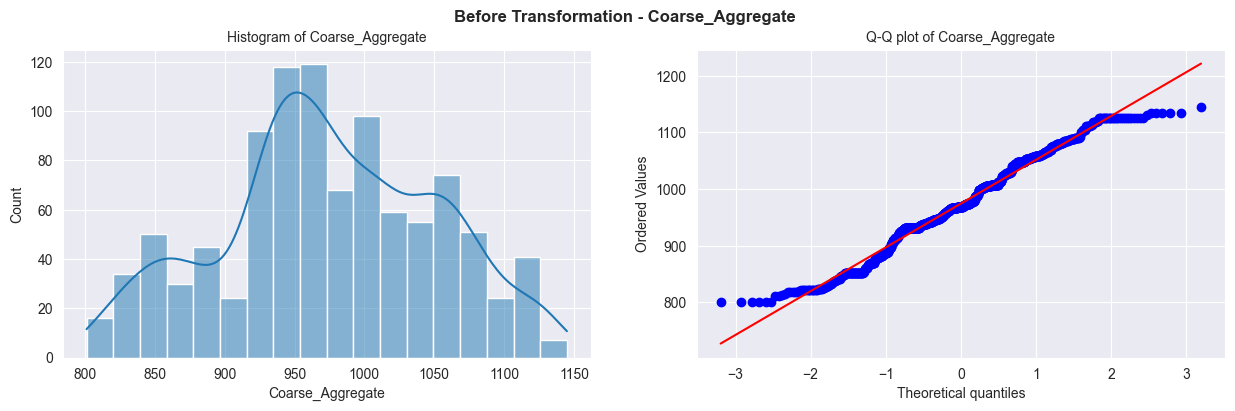

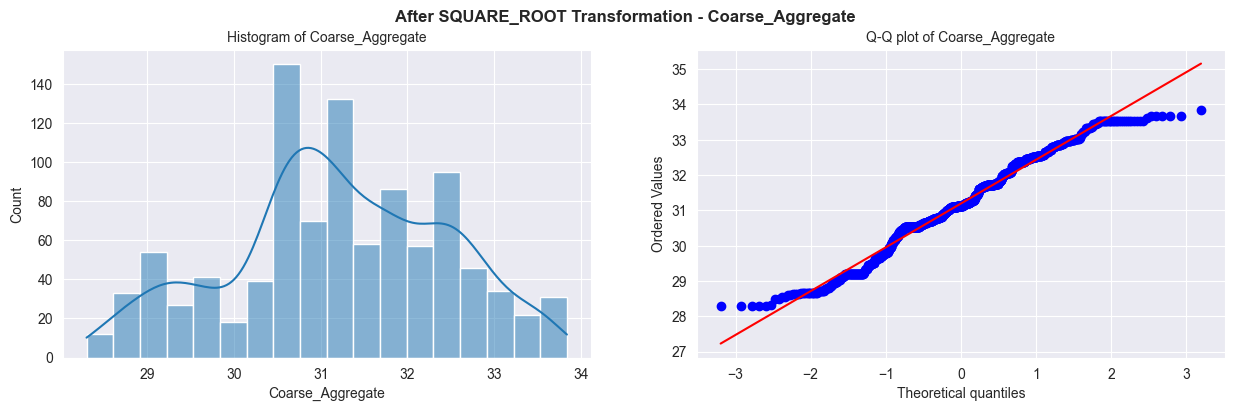

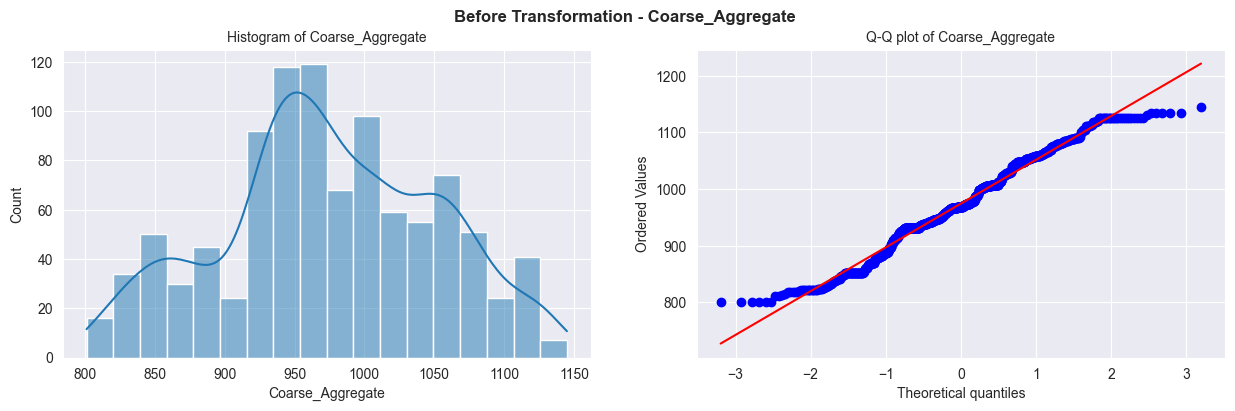

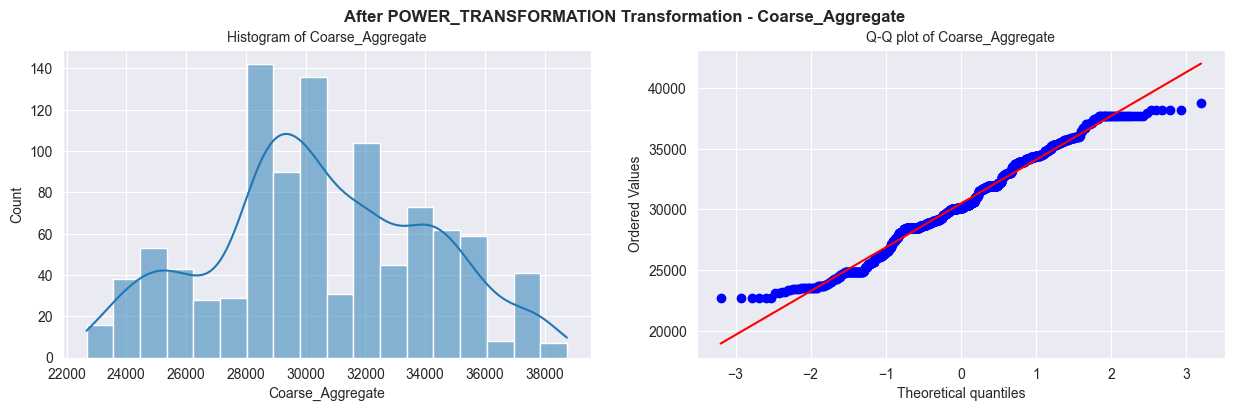

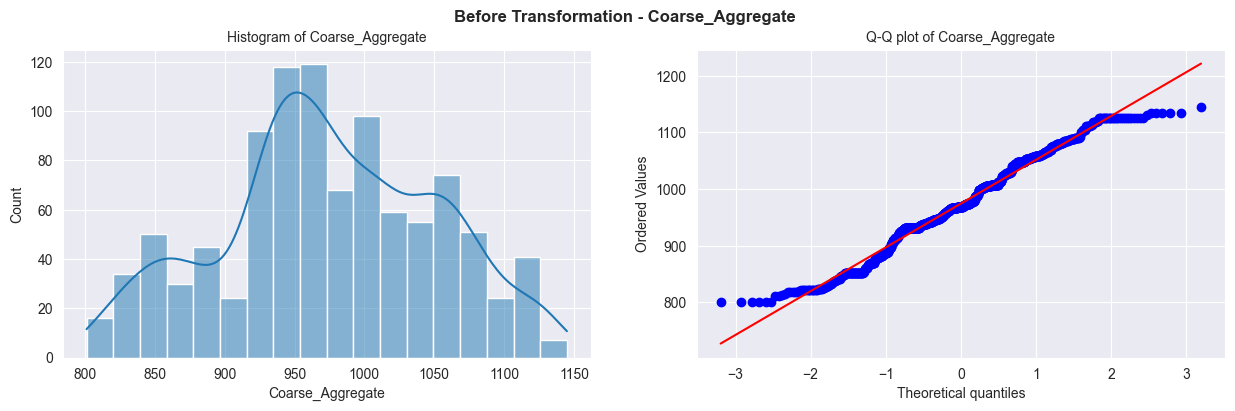

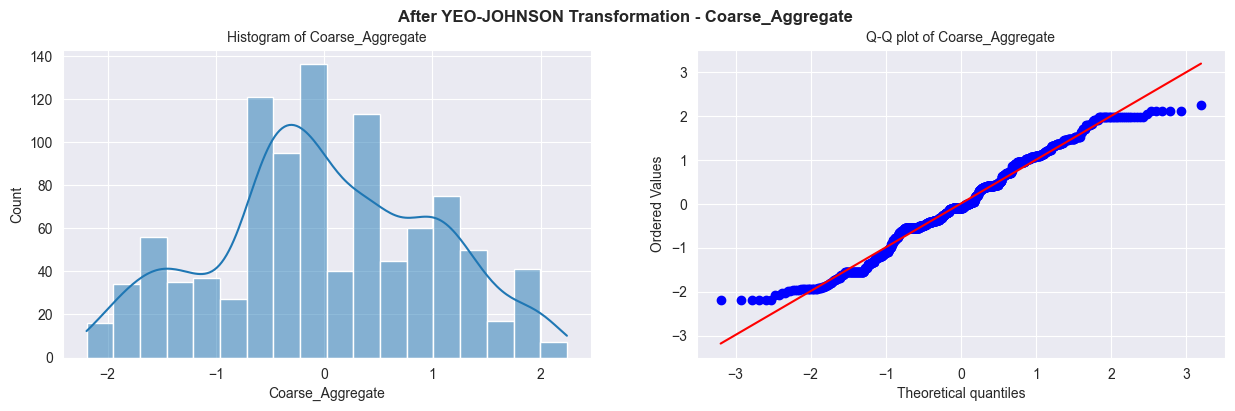

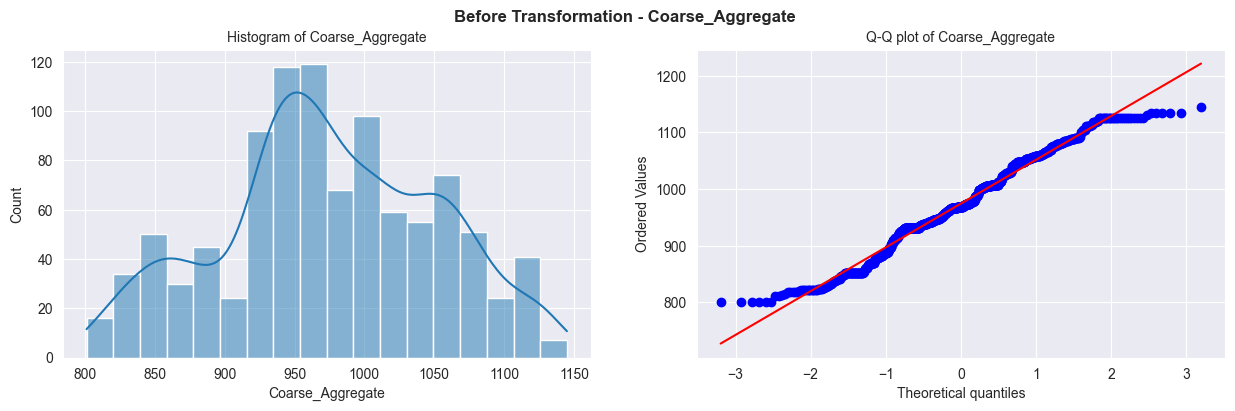

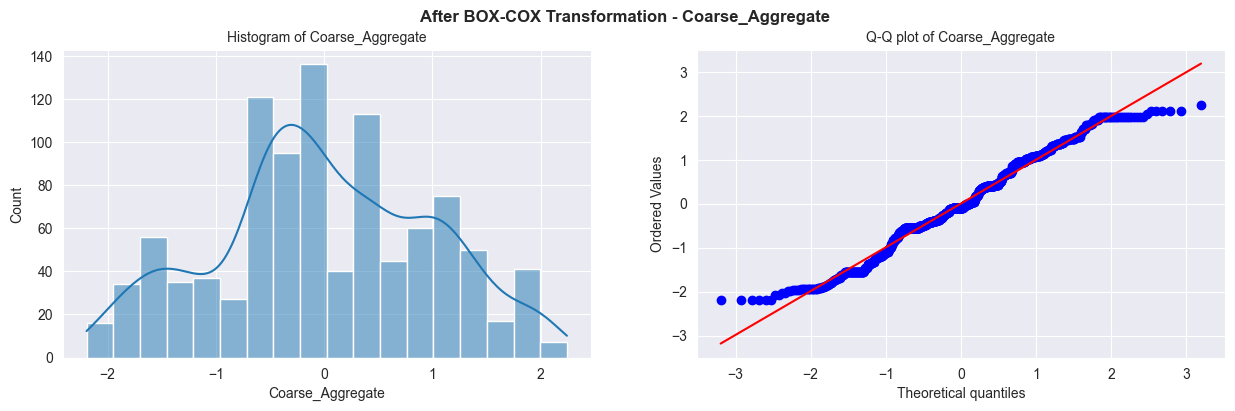

In [29]:
all_transformations('Coarse_Aggregate')

For **Coarse-Aggregate**, it is pretty much already has normality, but **Yeo-Johnson** reduces the skewness a little more.

### Fine_Aggregate

Transformation Name  Skewness
5           Yeo-Johnson -0.019380
6               Box-Cox -0.019400
4  Power_Transformation -0.142215
0              Original -0.280665
3           square_root -0.419020
1     log_with_constant -0.556012
2            Reciprocal  0.828116

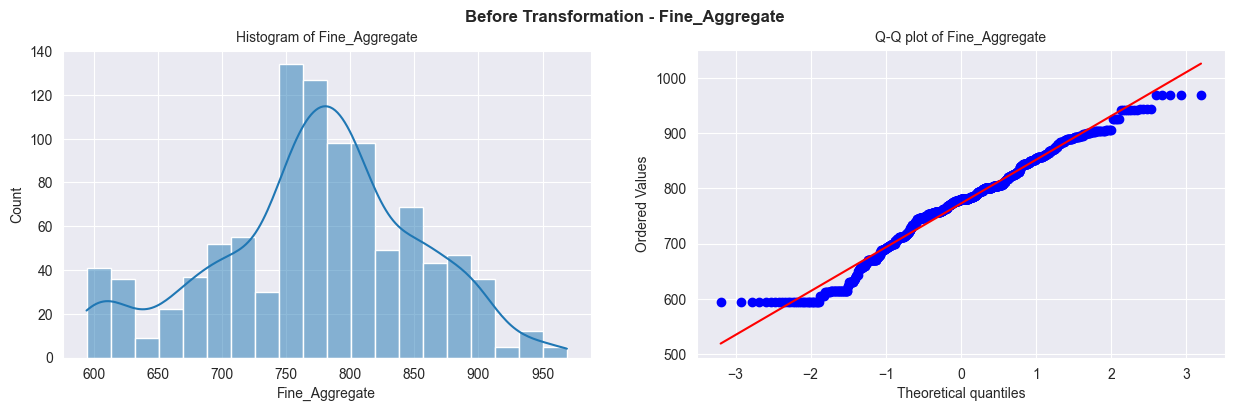

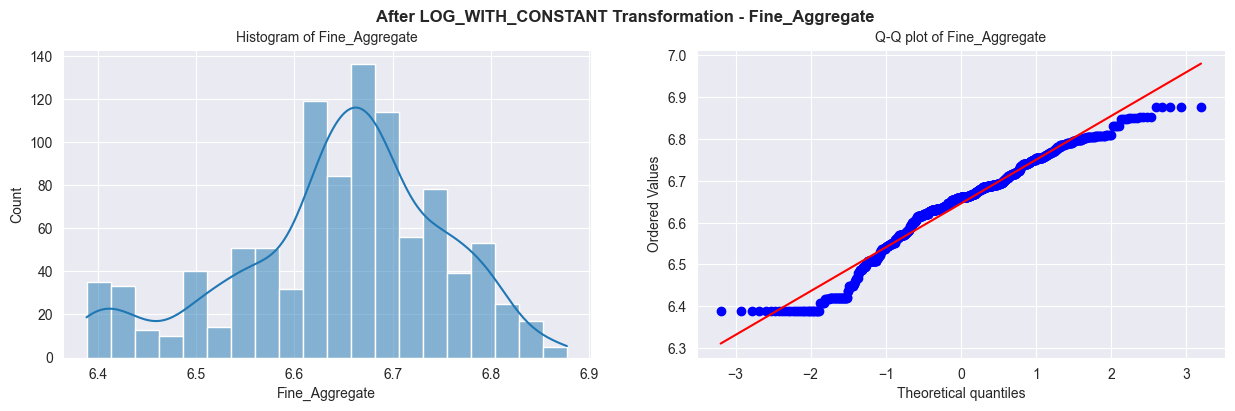

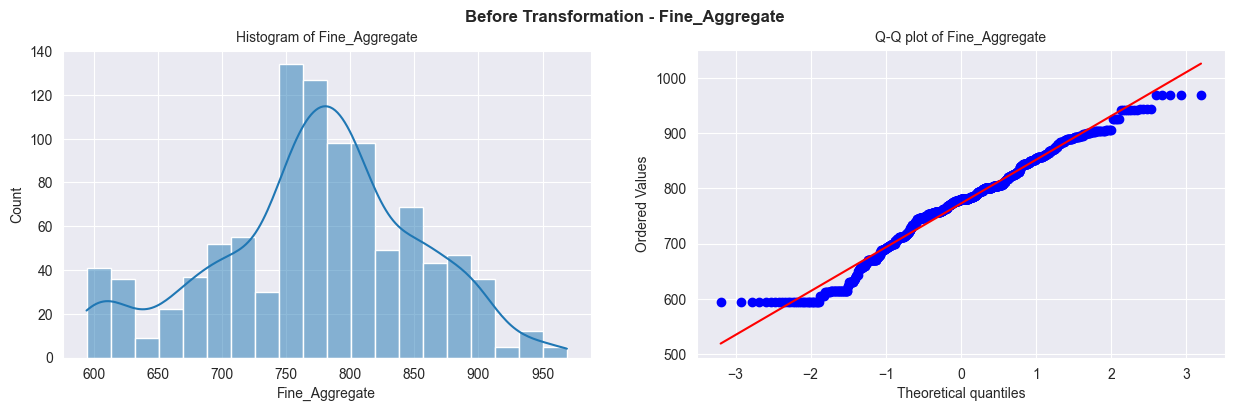

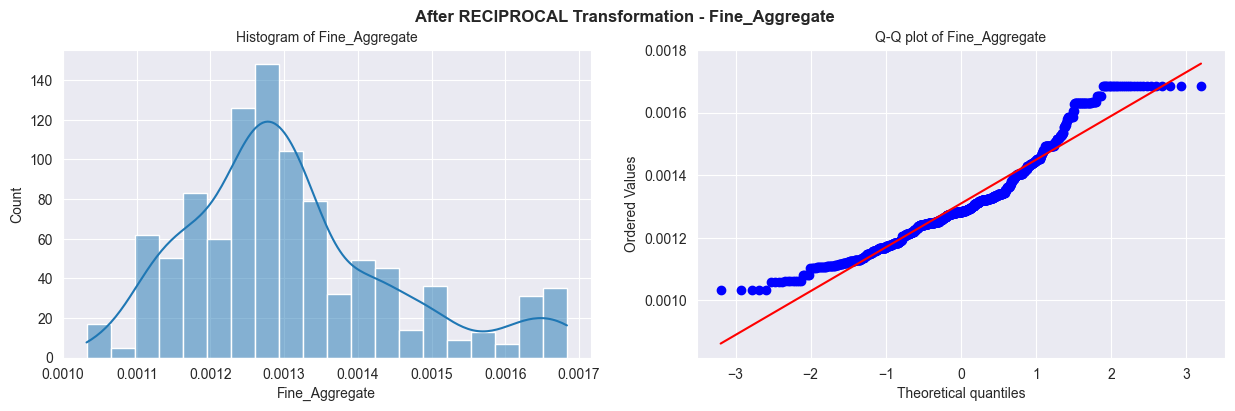

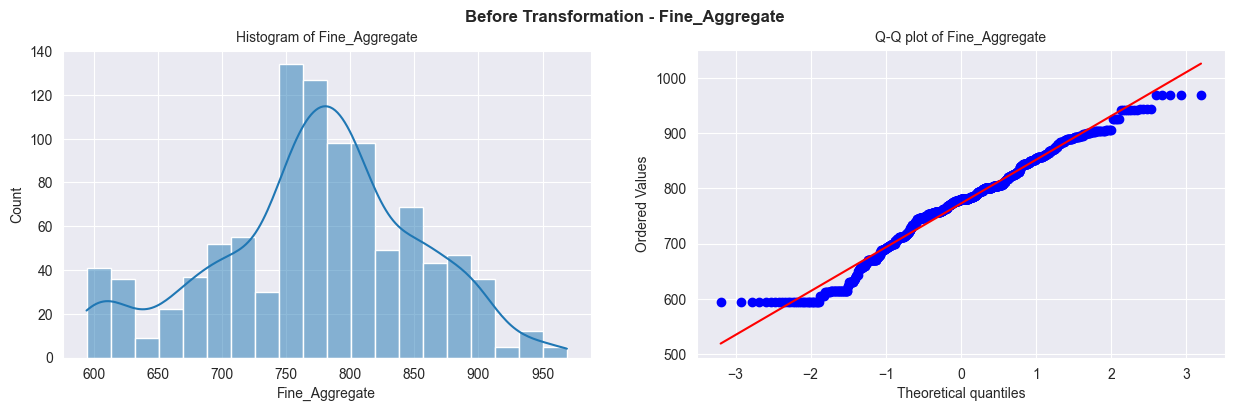

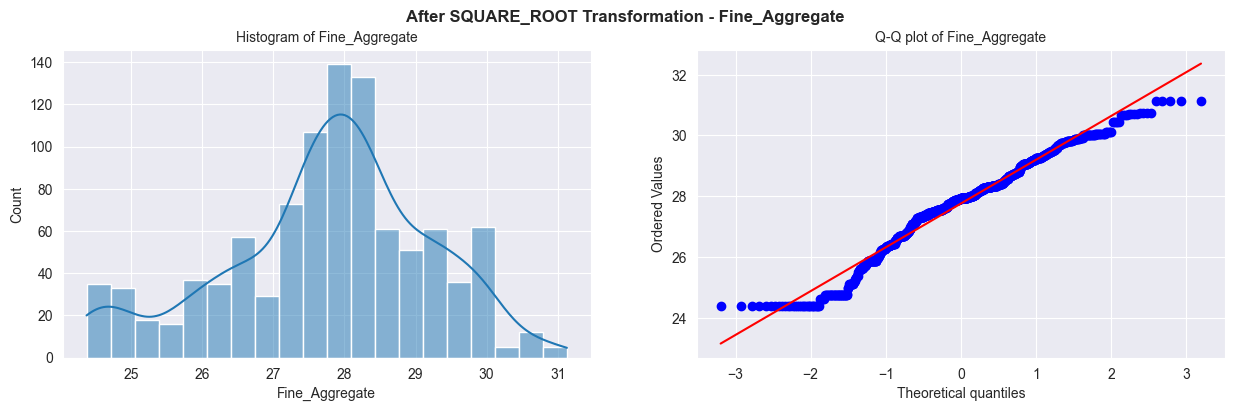

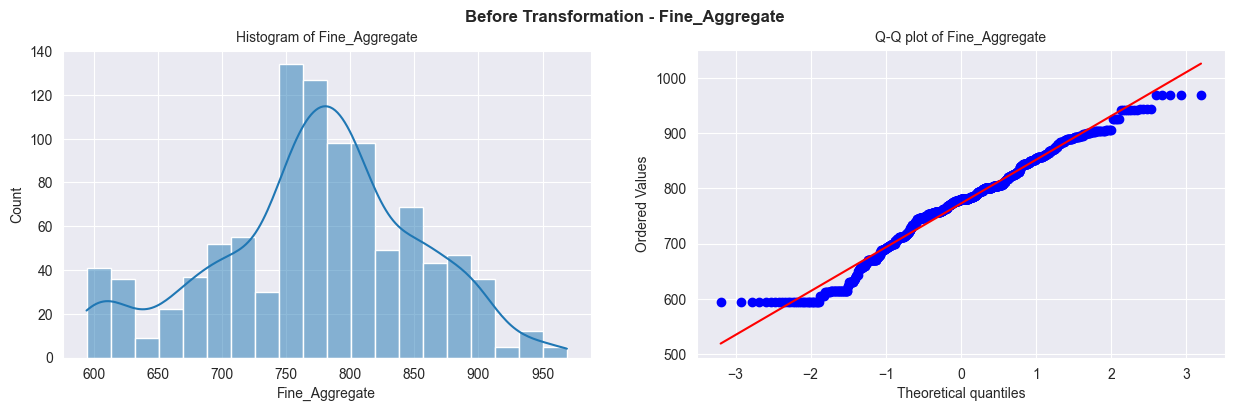

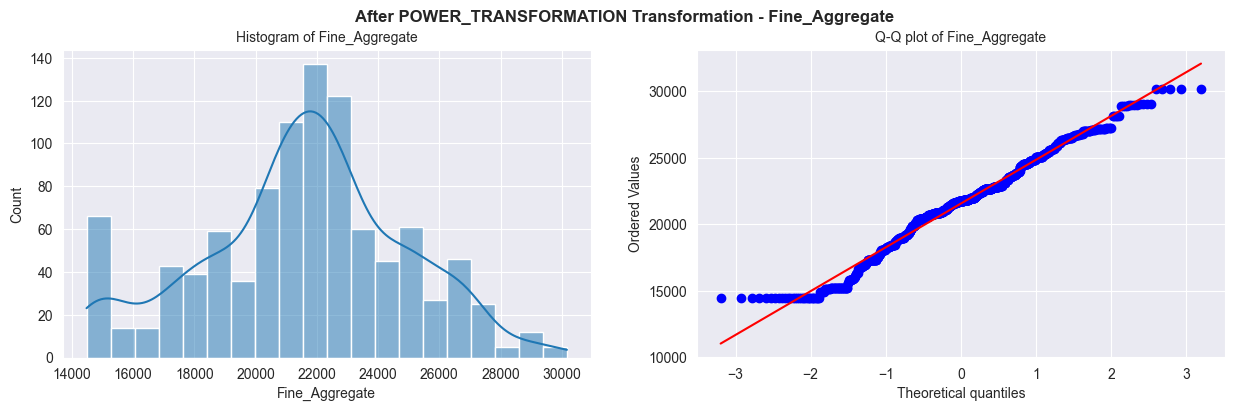

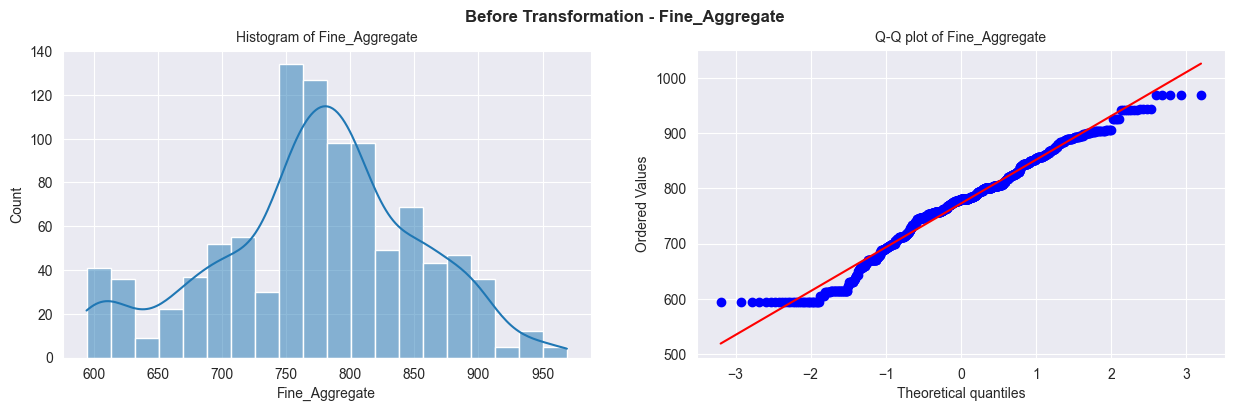

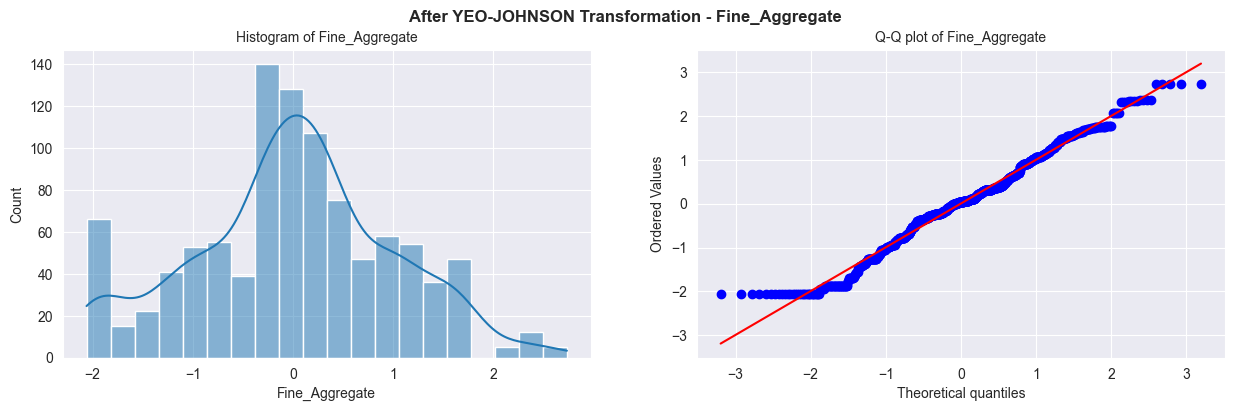

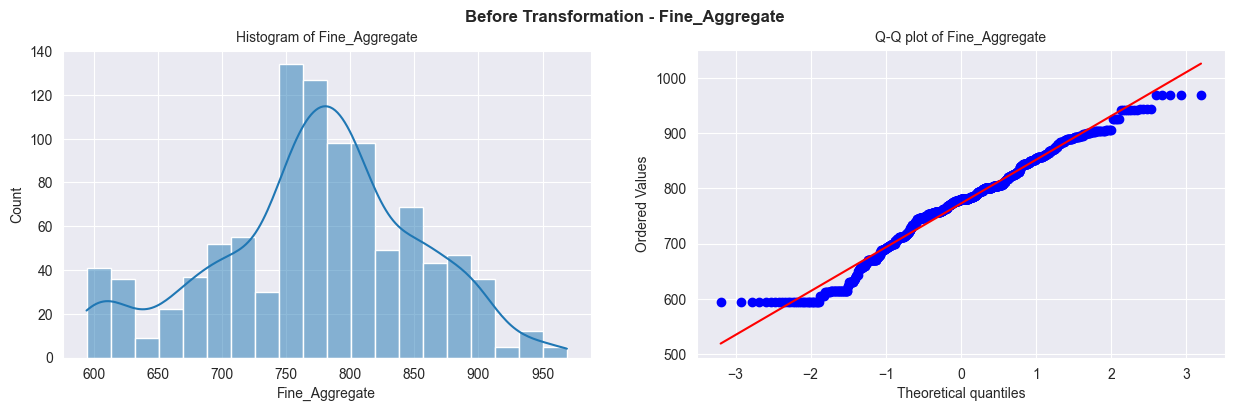

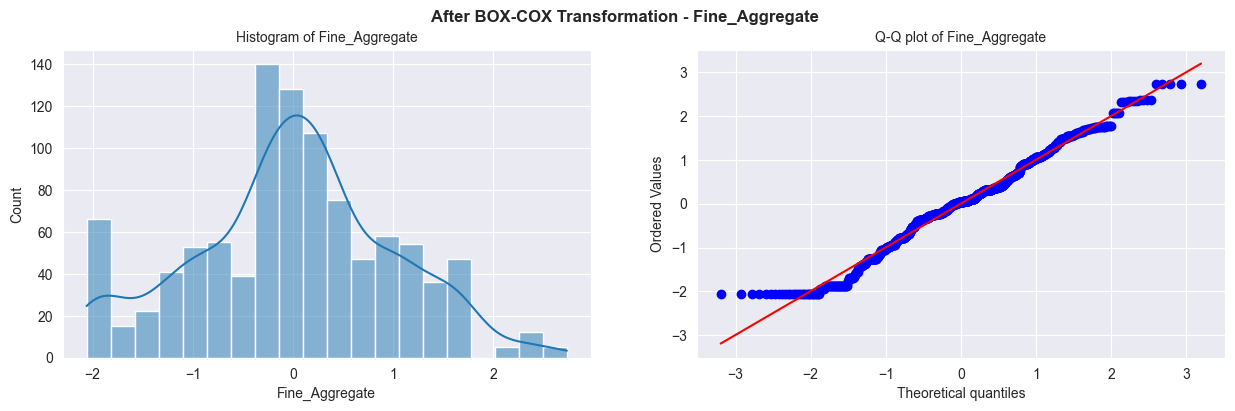

In [30]:
all_transformations('Fine_Aggregate')

For ***Fine_Aggregate***, both **Box-Cox** and **Yeo-Johnson** works best

### Age

Transformation Name  Skewness
5           Yeo-Johnson -0.046405
6               Box-Cox -0.061648
1     log_with_constant -0.331182
3           square_root  0.499612
0              Original  1.178188
4  Power_Transformation  1.562422
2            Reciprocal  1.688860

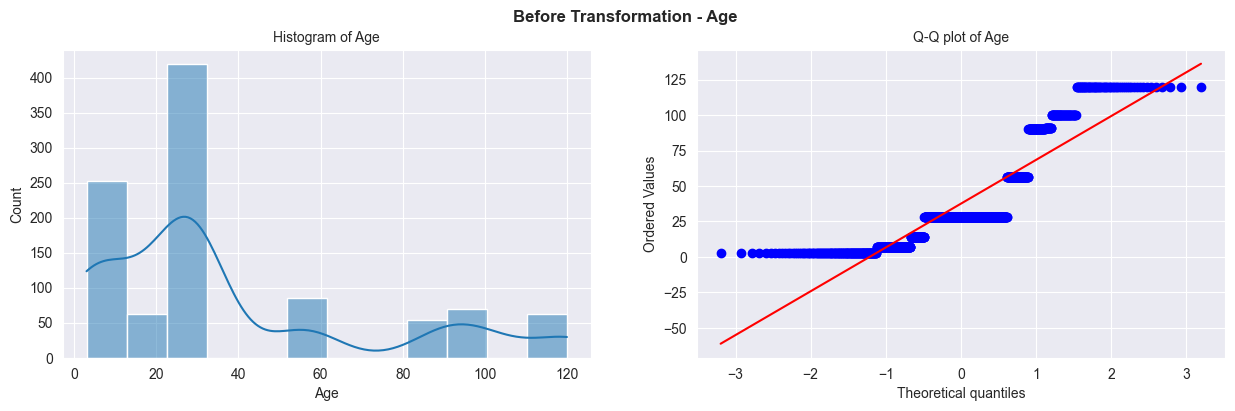

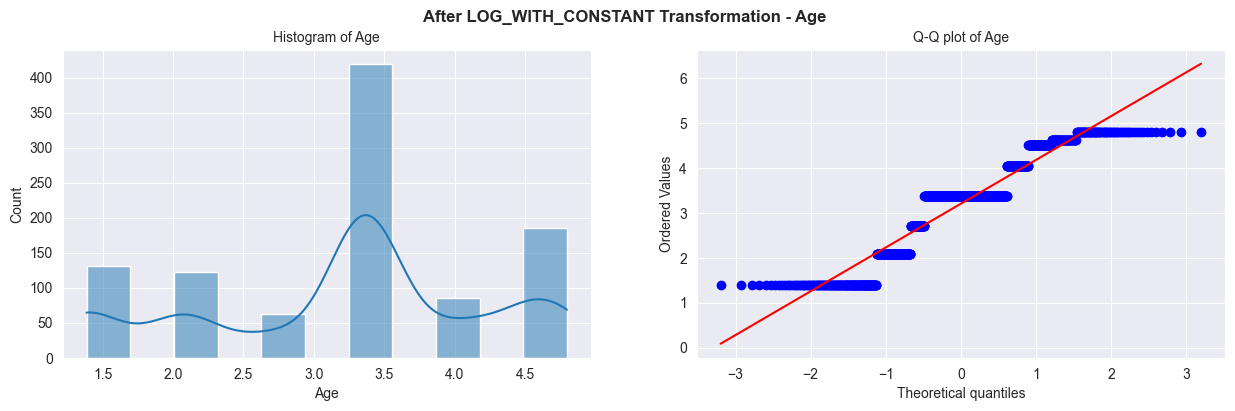

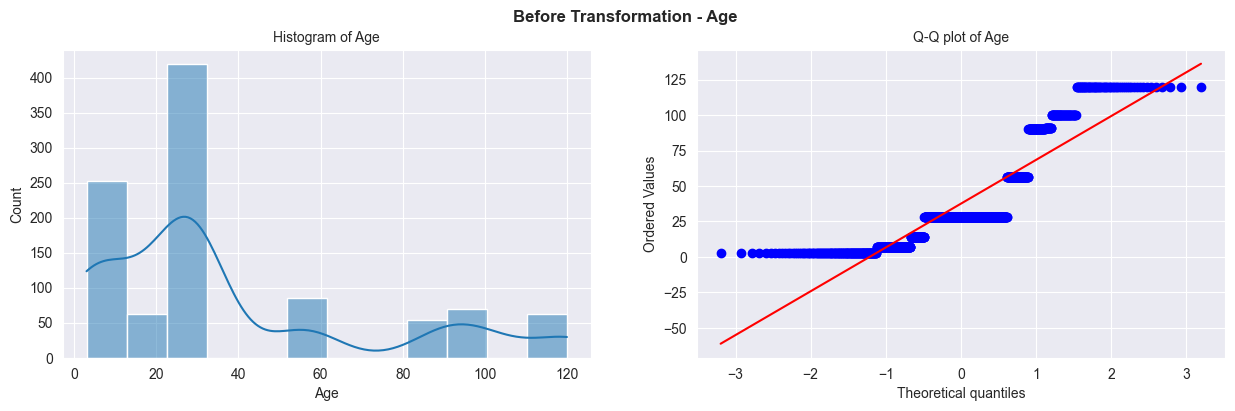

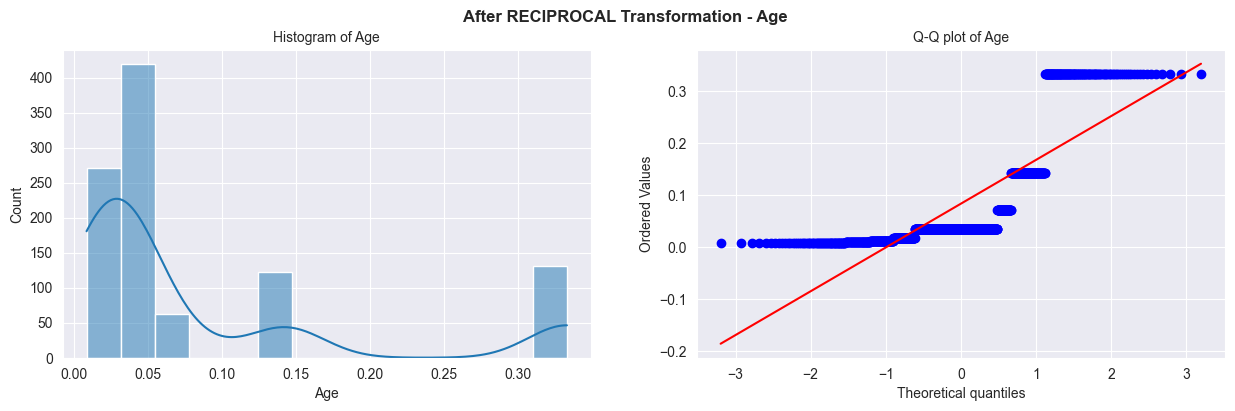

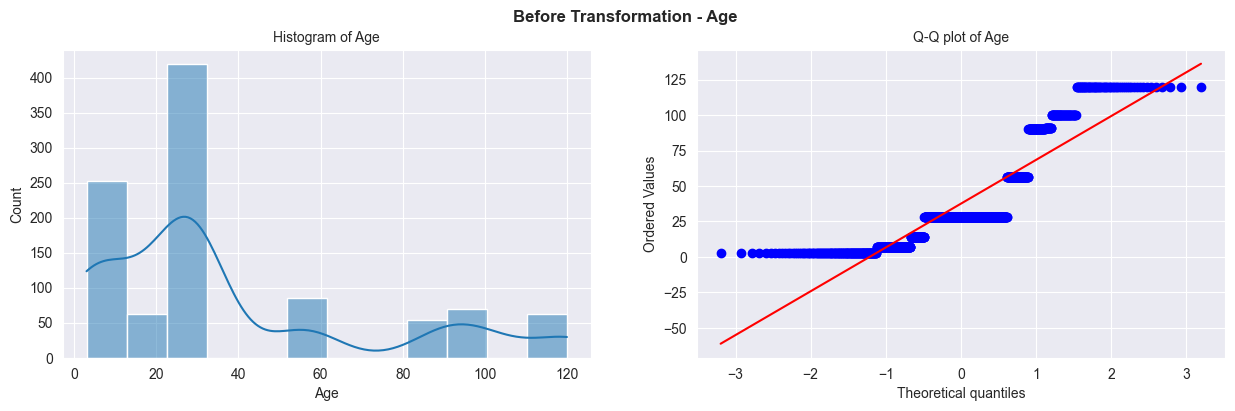

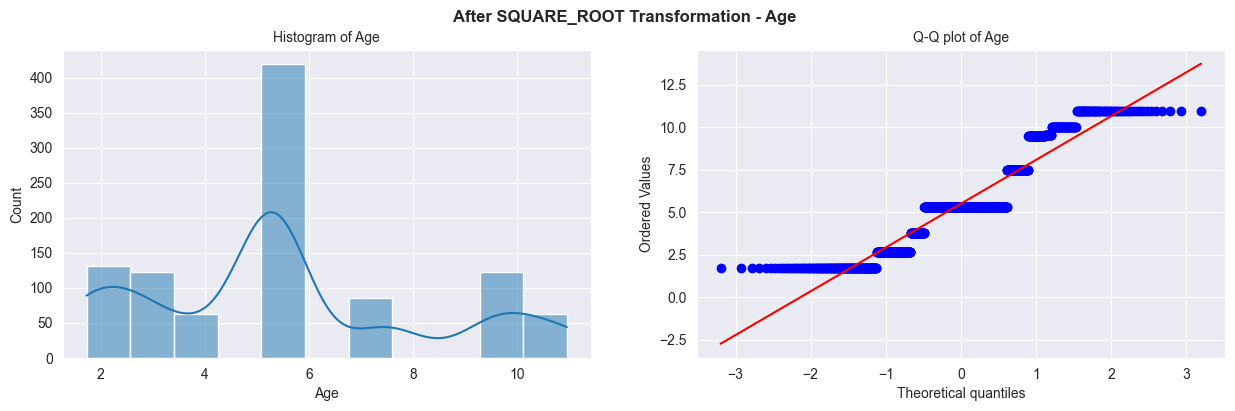

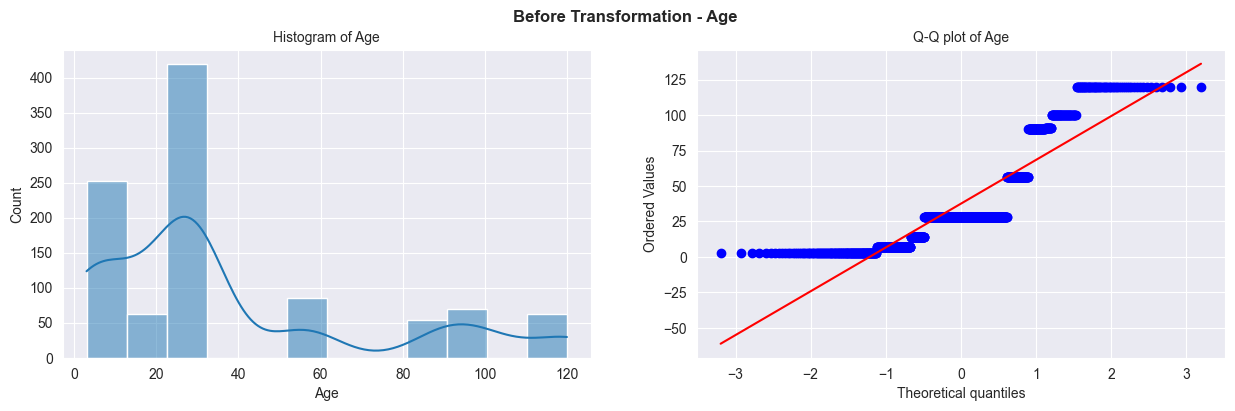

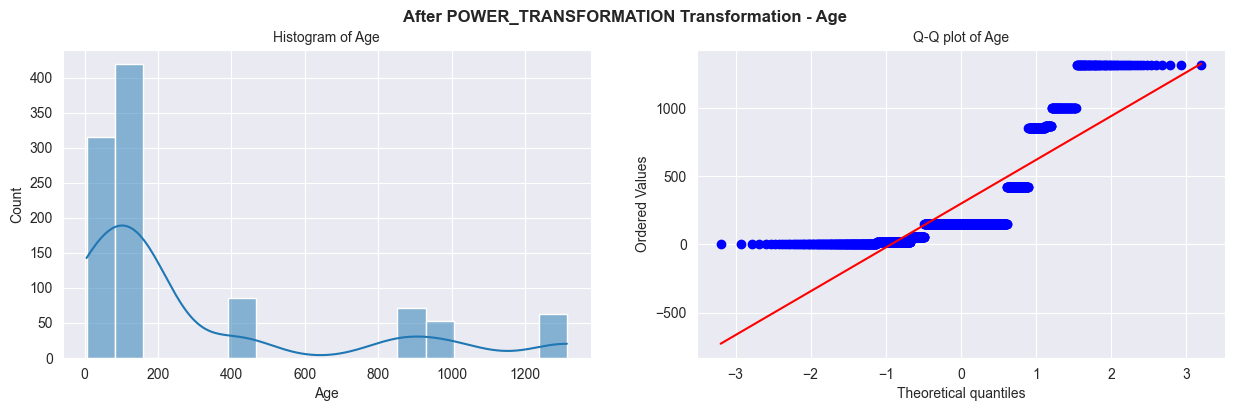

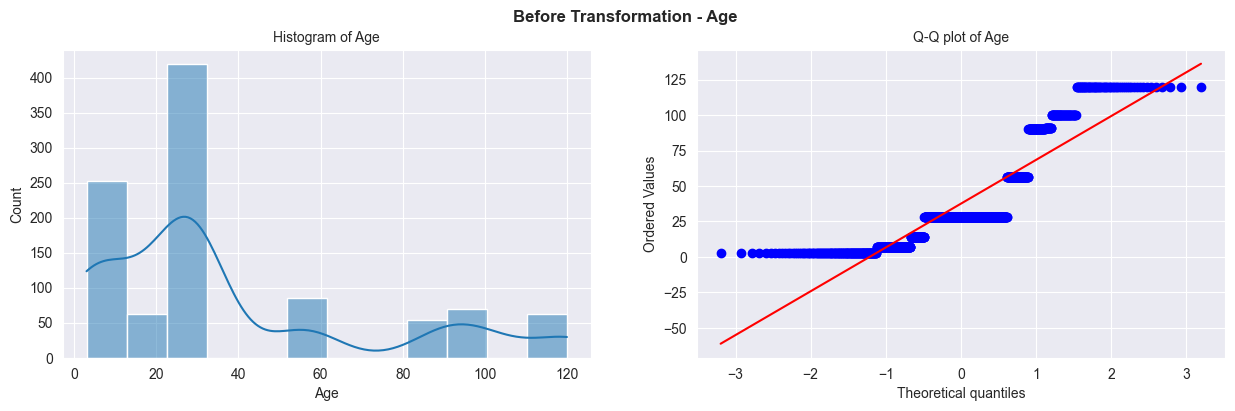

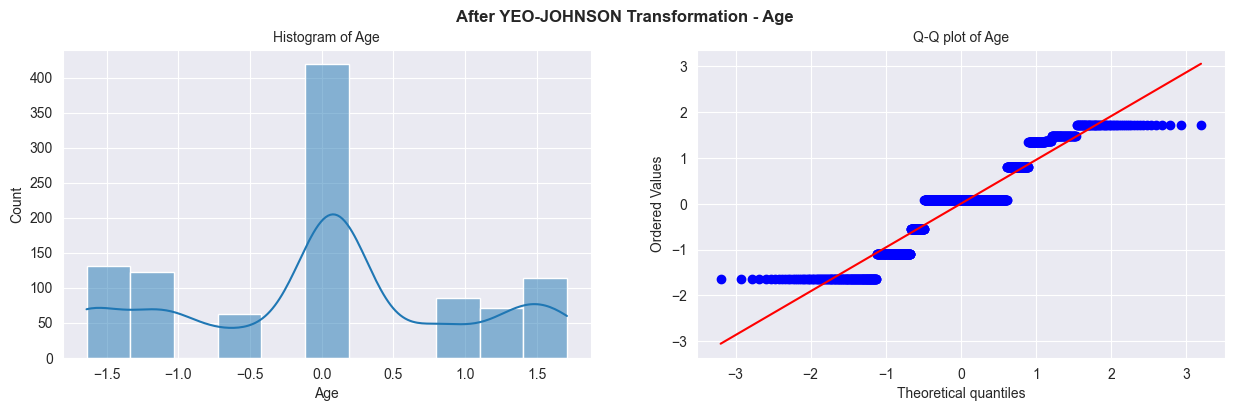

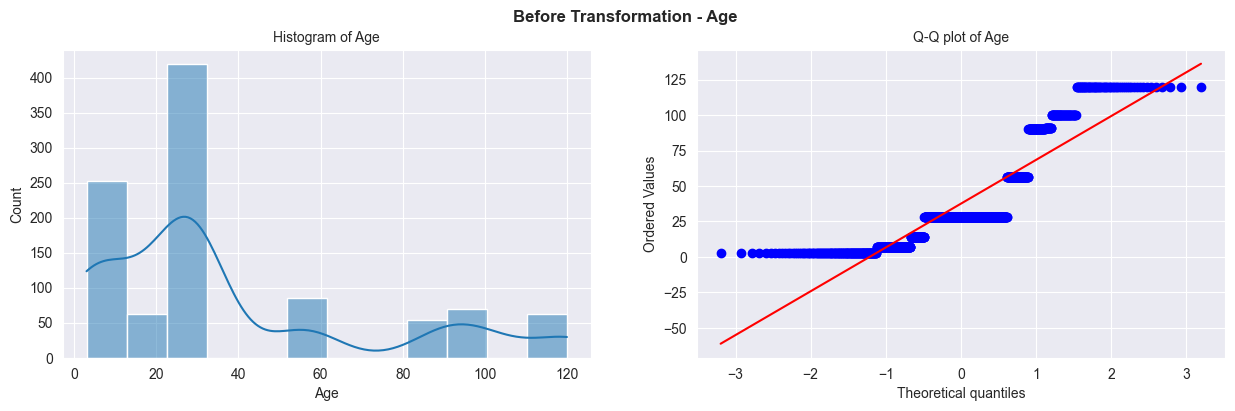

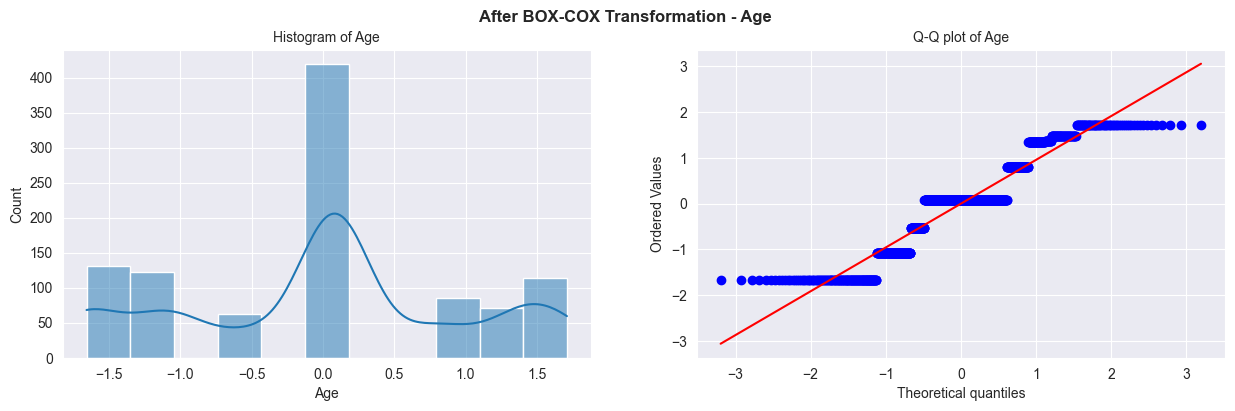

In [31]:
all_transformations('Age')

For ***Age***, **Log_with_constant**, **Box-Cox**, and **Yeo-Johnson** works best

# Conclusion:

- **Cement** - Yeo_Johnson
- **Furnace_Slag** - Yeo_Johnson
- **Fly_Ash** - Yeo_Johnson (Slightly better than Original)
- **Water** - Box-Cox and Yeo_Johnson
- **Superplaticizer** - Yeo_Johnson
- **Coarse_Aggregate** - PowerTransformation(power=1.5), Yeo_Johnson, and Box-Cox 
- **Fine_Aggregate** - Yeo_Johnson and Box-Cox
- **Age** - Yeo-Johnson, Box-Cox and Log with constant

# Next: 

Model Building, hyperparameter tuning and model evaluation is performed in **Concrete_ML.ipynb**